# Phân tích số lượng Anime theo Thể loại và Giới tính

**Ngày tạo:** 9/7/2024
**Tác giả:** [hkk4567]

In [14]:
## IMPORTS
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O
import polars as pl  # siêu nhanh
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
## CONFIGURATION
class Config:
    """
    Class đơn giản để lưu trữ các hằng số cấu hình của dự án.
    Các giá trị được định nghĩa dưới dạng thuộc tính của lớp.
    """
    # --- Cấu hình đường dẫn file ---
    # Sử dụng os.path.join để đảm bảo tương thích với các hệ điều hành khác nhau
    BASE_DIR = os.getcwd()
    DATA_DIR = os.path.join(BASE_DIR, 'dataset')
    INPUT_final_anime_CSV_PATH = os.path.join(DATA_DIR, 'final_animedataset.csv') # Thay 'anime_data.csv' bằng tên file thật của bạn
    
    # --- Cấu hình xử lý dữ liệu ---
    TARGET_GENDER = "Male" # Giới tính mục tiêu để phân tích
    
    # --- Cấu hình cột trong CSV ---
    # Giúp dễ dàng thay đổi nếu tên cột trong file CSV khác đi
    COLUMN_GENDER = "gender"
    COLUMN_GENRE = "genre"

In [16]:
## VISUALIZATION
def plot_top_n_genres(genre_counts_dict, top_n=15, title=""):
    """
    Vẽ đồ thị cột nằm ngang cho top N thể loại phổ biến nhất.

    Args:
        genre_counts_dict (dict): Dictionary chứa số lượng các thể loại.
        top_n (int): Số lượng thể loại hàng đầu cần hiển thị.
        title (str): Tiêu đề của đồ thị.
    """
    # 1. Lấy top N thể loại từ dictionary
    # Dictionary của bạn đã được sắp xếp giảm dần, nên chỉ cần lấy N phần tử đầu
    top_genres = dict(list(genre_counts_dict.items())[:top_n])
    
    # Chuyển đổi dictionary thành Pandas Series để vẽ dễ dàng hơn
    # Index sẽ là tên thể loại, values là số lượng
    genre_series = pd.Series(top_genres)
    
    # Đảo ngược series để thể loại có count cao nhất ở trên cùng
    genre_series = genre_series.sort_values(ascending=True)
    
    # 2. Thiết lập và vẽ đồ thị
    plt.style.use('seaborn-v0_8-whitegrid') # Sử dụng một style đẹp
    fig, ax = plt.subplots(figsize=(12, 8)) # Tạo Figure và Axes, điều chỉnh kích thước

    # Vẽ đồ thị cột nằm ngang
    bars = ax.barh(genre_series.index, genre_series.values, color=sns.color_palette("viridis", n_colors=top_n))

    # 3. Tinh chỉnh đồ thị cho đẹp và dễ đọc
    ax.set_title(title, fontsize=16, fontweight='bold', pad=20)
    ax.set_xlabel("Số lượng Anime", fontsize=12)
    ax.set_ylabel("Thể loại", fontsize=12)
    
    # Xóa các đường viền không cần thiết
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Thêm nhãn dữ liệu (con số) vào cuối mỗi cột
    for bar in bars:
        width = bar.get_width()
        ax.text(width + 0.1,  # Vị trí x của text (dịch sang phải một chút)
                bar.get_y() + bar.get_height() / 2, # Vị trí y của text (giữa cột)
                f'{int(width)}', # Giá trị text (chuyển thành số nguyên)
                va='center', # Căn giữa theo chiều dọc
                ha='left')   # Căn lề trái

    # Tăng giới hạn trục x để có không gian cho nhãn
    ax.set_xlim(right=ax.get_xlim()[1] * 1.1)
    
    plt.tight_layout() # Tự động điều chỉnh để không bị cắt xén
    plt.show()


In [17]:
## FUNCTIONS

def checkSrcAnimeWithGenresandGender(path, gender):
     # 1) Khởi tạo LazyFrame, không load hết ngay
    lf = pl.scan_csv(
        path,
        schema_overrides={"genre": pl.Utf8, "gender": pl.Utf8},
        low_memory=True,
    )
    
    # 2) lọc, tách, explode, group, đếm, sort
    condition = lf.filter((pl.col(Config.COLUMN_GENDER) == gender) & (pl.col(Config.COLUMN_GENRE).is_not_null()))
    exploded_genre = condition.with_columns([pl.col(Config.COLUMN_GENRE).str.split(", ")]).explode(Config.COLUMN_GENRE)

    count_genre = exploded_genre.group_by(Config.COLUMN_GENRE).agg(
        pl.len().alias("count") # len() = count()
    ).sort("count", descending=True).collect(engine="streaming")

    return dict(zip(count_genre[Config.COLUMN_GENRE].to_list(), count_genre["count"].to_list()))

def calculate_romcom_average(genre_counts_dict):
    # Sử dụng .get(key, 0) để tránh lỗi KeyError nếu thể loại không tồn tại
    comedy_count = genre_counts_dict.get("Comedy", 0)
    romance_count = genre_counts_dict.get("Romance", 0)
    
    # Tránh chia cho 0 nếu cả hai đều không có
    if comedy_count + romance_count == 0:
        return 0.0

    return (comedy_count + romance_count) / 2


Bắt đầu quá trình phân tích...
Đang phân tích file 'd:\testAnimeDataset\dataset\final_animedataset.csv' cho giới tính 'Male'...

Từ điển đếm tất cả các thể loại:
{'Comedy': 12443717, 'Action': 10506464, 'Romance': 7422955, 'Drama': 6718771, 'Fantasy': 6232419, 'School': 6205281, 'Supernatural': 5899197, 'Shounen': 5862779, 'Sci-Fi': 5428070, 'Adventure': 5195149, 'Slice of Life': 3883658, 'Ecchi': 3445785, 'Mystery': 2919722, 'Magic': 2571788, 'Seinen': 2401731, 'Super Power': 2386774, 'Harem': 2348115, 'Mecha': 1906338, 'Psychological': 1799698, 'Military': 1623363, 'Horror': 1294767, 'Historical': 1286460, 'Parody': 1019751, 'Demons': 1010298, 'Shoujo': 965196, 'Thriller': 903155, 'Sports': 847317, 'Martial Arts': 845883, 'Game': 737367, 'Music': 716207, 'Space': 704505, 'Vampire': 679943, 'Hentai': 553526, 'Police': 503840, 'Samurai': 434005, 'Kids': 350560, 'Dementia': 290713, 'Shoujo Ai': 259122, 'Josei': 253220, 'Cars': 79235, 'Shounen Ai': 48323, 'Yuri': 31274, 'Yaoi': 18342}

G

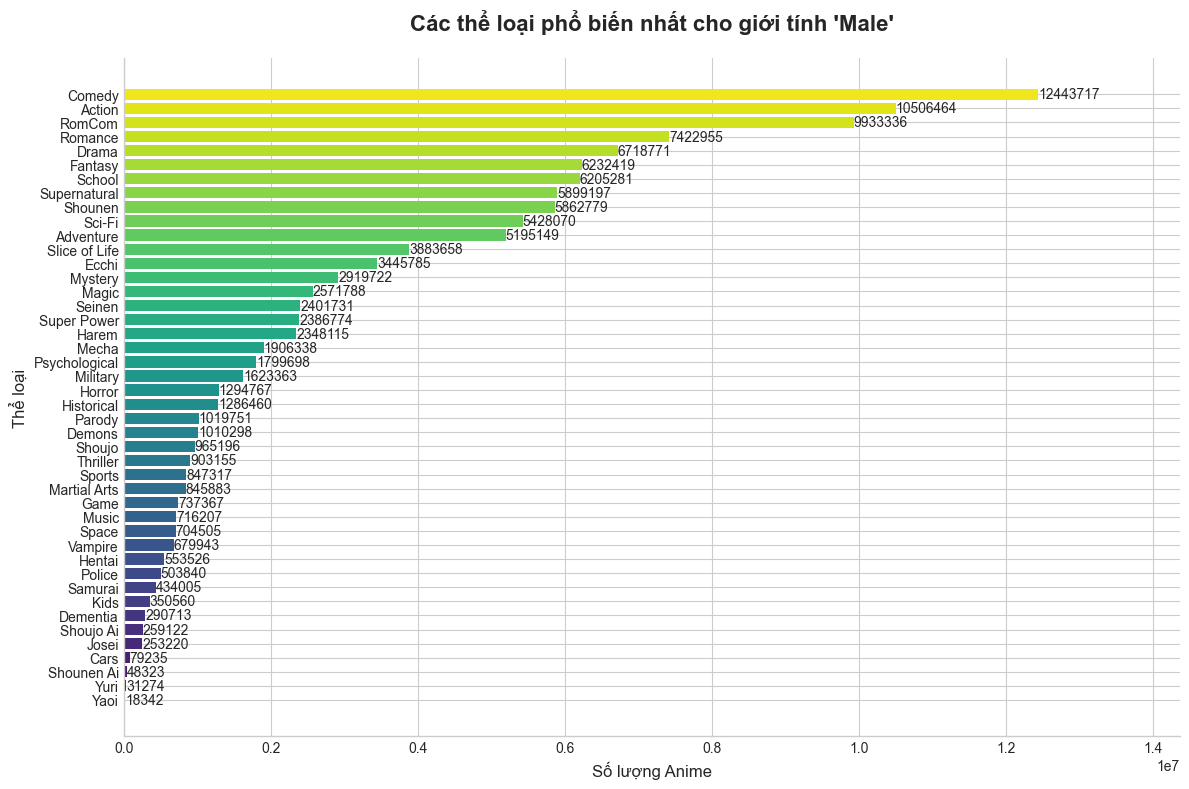


Hoàn thành!


In [18]:
## MAIN EXECUTION

if __name__ == '__main__':
    print("Bắt đầu quá trình phân tích...")
    
    # --- BƯỚC 1: XỬ LÝ FILE 1 LẦN DUY NHẤT VÀ LƯU KẾT QUẢ ---
    # Đây là bước tốn thời gian nhất. Chỉ thực hiện 1 lần.
    print(f"Đang phân tích file '{Config.INPUT_final_anime_CSV_PATH}' cho giới tính '{Config.TARGET_GENDER}'...")
    all_genre_counts = checkSrcAnimeWithGenresandGender(
        Config.INPUT_final_anime_CSV_PATH, 
        Config.TARGET_GENDER
    )

    # --- BƯỚC 2: SỬ DỤNG KẾT QUẢ ĐÃ LƯU ---
    
    # 2.1. In ra toàn bộ từ điển kết quả (nếu muốn)
    print("\nTừ điển đếm tất cả các thể loại:")
    genres = all_genre_counts
    print(genres)
    
    # 2.2. Truyền kết quả vào hàm tính toán (rất nhanh vì không phải đọc lại file)
    romcom_avg = calculate_romcom_average(all_genre_counts)
    print(f"\nGiá trị trung bình của 'Rom-Com': {romcom_avg:.2f}")
    all_genre_counts['RomCom'] = romcom_avg

    # 2.3. VẼ ĐỒ THỊ
    print("\nĐang tạo đồ thị...")
    plot_top_n_genres(
        genre_counts_dict=all_genre_counts,
        top_n=len(genres), # Bạn có thể thay đổi số này
        title=f"Các thể loại phổ biến nhất cho giới tính '{Config.TARGET_GENDER}'"
    )
    
    
    print("\nHoàn thành!")

# Phân tích thống kê đánh giá của user

**Ngày tạo:** 9/7/2024
**Tác giả:** [hkk4567]

In [1]:
# import polars as pl

# # Sử dụng lại schema và lazy reading để đọc CSV hiệu quả
# # ... (đoạn code định nghĩa new_dtypes của bạn) ...
# new_dtypes = {
#     "username": pl.String,
#     "anime_id": pl.Int64,
#     "my_score": pl.Int64,
#     "user_id": pl.Int64,
#     "gender": pl.String,
#     "title": pl.String,
#     "type": pl.String,
#     "source": pl.String,
#     "score": pl.Float64,
#     "scored_by": pl.Int64,
#     "rank": pl.Float64,
#     "popularity": pl.Int64,
#     "genre": pl.String
# }
# print("Đang đọc file CSV để chuyển đổi...")
# lazy_df = pl.scan_csv(
#     "dataset/final_animedataset.csv",
#     schema_overrides=new_dtypes,
#     ignore_errors=True
# )

# parquet_path = "dataset/final_animedataset.parquet"
# print(f"Đang ghi ra file Parquet: {parquet_path}...")

# # Sink_parquet sẽ thực thi lazy query và ghi kết quả ra file
# # Nó xử lý theo từng chunk nên rất tiết kiệm RAM
# lazy_df.sink_parquet(parquet_path, compression='zstd')

# print("Chuyển đổi sang Parquet hoàn tất!")

Polars version: 1.31.0
Pandas version: 2.3.1
--------------------------------------------------
Đang đọc file: dataset/final_animedataset.parquet...
Kích thước dữ liệu gốc đã đọc: (35305695, 13)
--------------------------------------------------
Kích thước mẫu ban đầu (1%): (353056, 13)
Kích thước mẫu sau khi xử lý và explode 'genre': (1544015, 13)
--------------------------------------------------
Bắt đầu phân tích ANOVA...

Top 10 thể loại phổ biến nhất trong mẫu:
['Comedy', 'Action', 'Romance', 'Drama', 'Fantasy', 'School', 'Supernatural', 'Shounen', 'Adventure', 'Sci-Fi']

Đang chuẩn bị dữ liệu cho ANOVA...
Đang thực hiện kiểm định ANOVA...

Kết quả ANOVA:
  F-statistic: 57.9451
  p-value: 1.521125044175333e-106
--------------------------------------------------
Phát biểu giả thuyết:
  H₀ (Giả thuyết không): Điểm my_score trung bình của tất cả 10 thể loại là như nhau.
  Hₐ (Giả thuyết thay thế): Có ít nhất một thể loại có điểm my_score trung bình khác biệt.
------------------------

:BoxWhisker   [genre]   (my_score)


Quy trình phân tích đã hoàn tất!

BƯỚC 5: PHÂN TÍCH MÔ HÌNH MỞ RỘNG
Đang chuẩn bị dữ liệu cho phân tích mở rộng...
Top 5 nguồn gốc anime phổ biến nhất sẽ được phân tích: ['Manga', 'Original', 'Light novel', 'Visual novel', 'Novel']
Kích thước dữ liệu cho phân tích mở rộng: (879636, 13)

Đang chuyển đổi dữ liệu sang Pandas...
Đang thực hiện mô hình hồi quy đa biến với các tương tác...

Bảng ANOVA cho các YẾU TỐ CHÍNH:
                  sum_sq        df             F        PR(>F)
C(genre)    6.654861e+03       9.0     49.053049  2.006899e-89
C(gender)   4.686902e+04       1.0   3109.248193  0.000000e+00
C(source)   3.581356e+03       4.0     59.395973  3.123133e-50
popularity  2.893182e+05       1.0  19193.104694  0.000000e+00
Residual    1.325945e+07  879620.0           NaN           NaN
--------------------------------------------------

Bắt đầu xây dựng và ghi kết quả diễn giải ra file...

✅ HOÀN TẤT: Toàn bộ kết quả diễn giải đã được ghi vào file 'ket_qua_phan_tich.txt'
   Hãy mở f

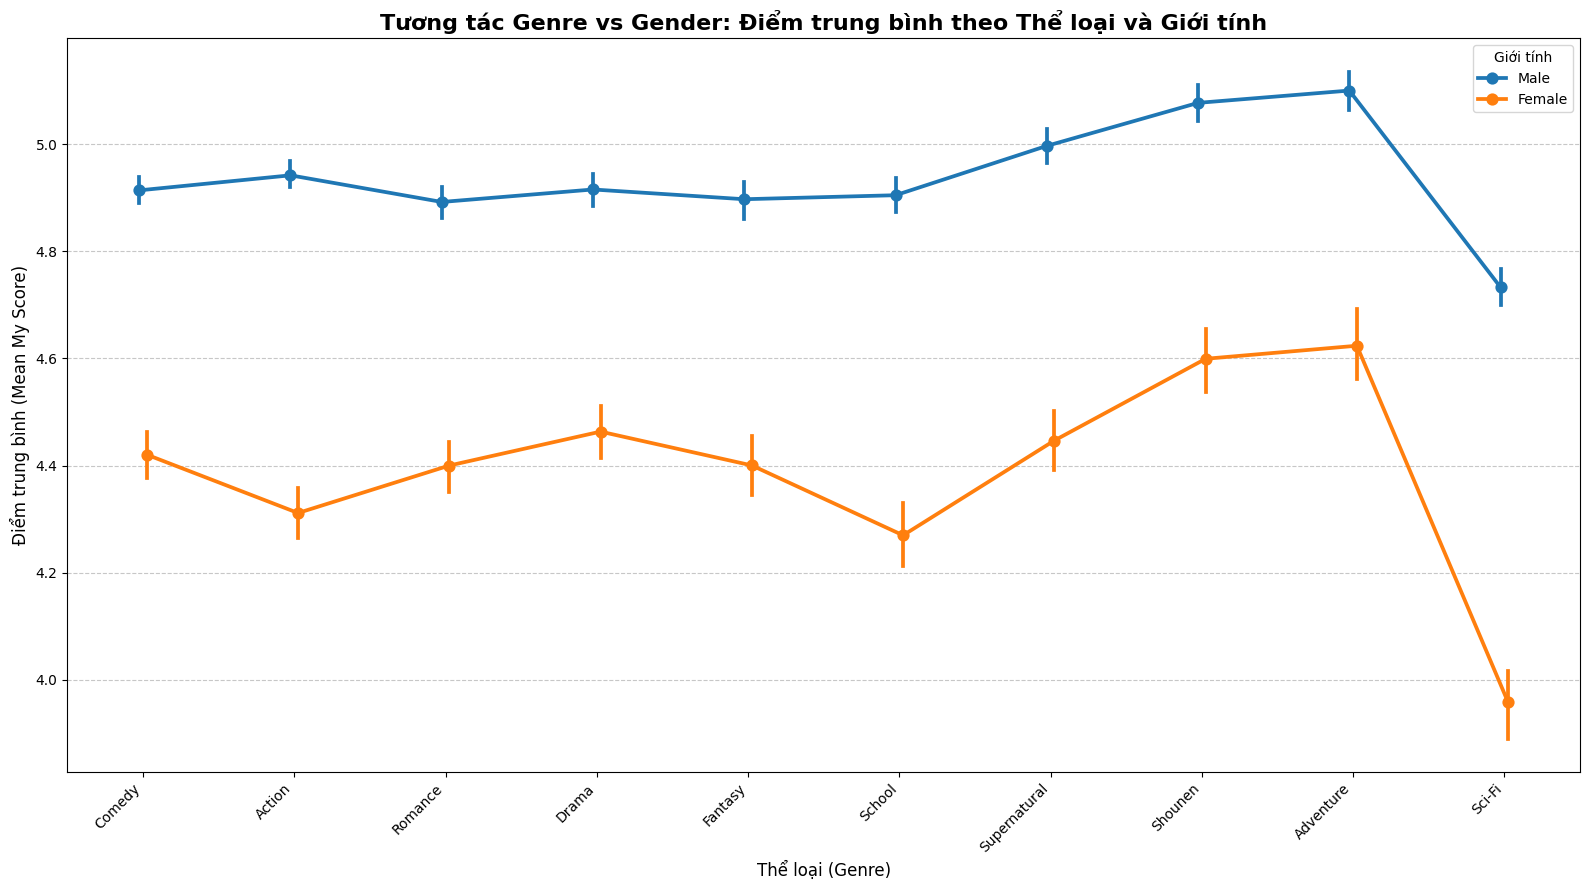

   >> Nhận xét: Các đường không song song, tuy nhiên lại cho thấy Nam luôn đánh giá điểm cao hơn trong tất cả thể loại so với Nữ
      xác nhận có sự tương tác. Nam và Nữ có sở thích khá giống nhau trên tất cả thể loại (ngoại trừ 'school', 'action).

2. Đang vẽ biểu đồ tương tác: Nguồn gốc (Source) vs Giới tính (Gender)...


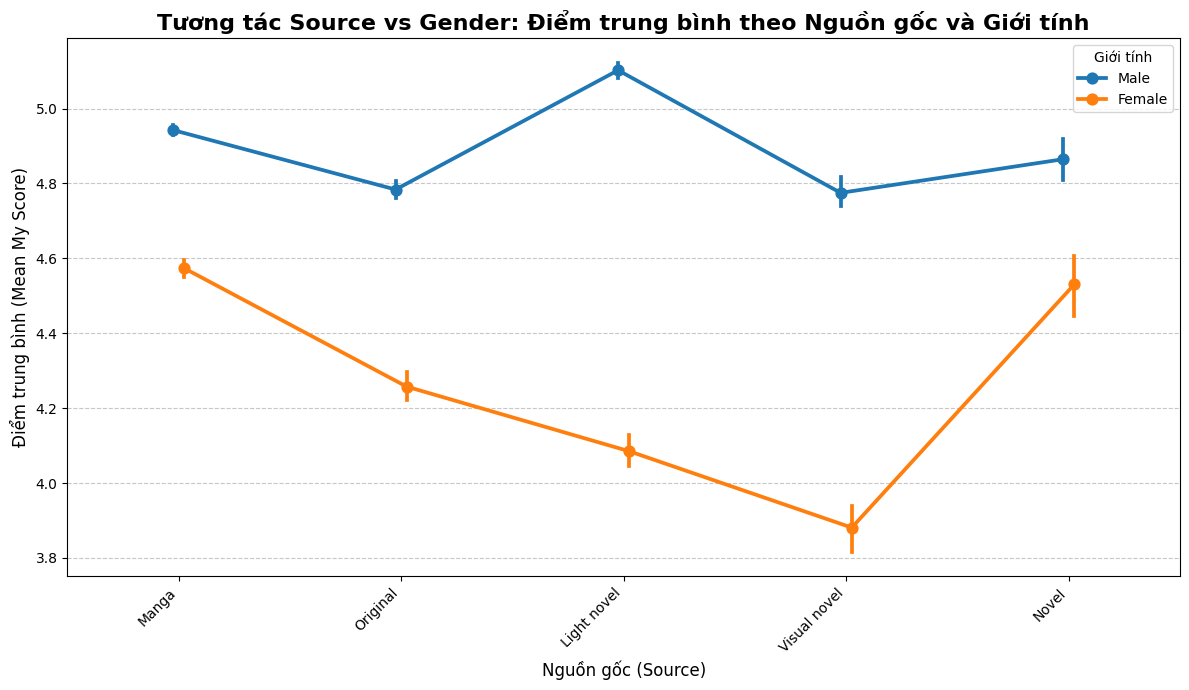

   >> Nhận xét: Nam giới (Male) có xu hướng chấm điểm cao hơn Nữ giới (Female) ở hầu hết các nguồn gốc,
      Nữ có xu hướng chấm điểm cao cho những bộ anime có nguồn gốc 'Manga' và 'Novel' gần giống như Nam,
      nhưng ở Nam có xu hướng chấm điểm cao cho những bộ anime có nguồn gốc 'Light Novel' vượt hơn tất cả thể loại khác.

3. Đang vẽ biểu đồ tương tác: Thể loại (Genre) vs Nguồn gốc (Source)...


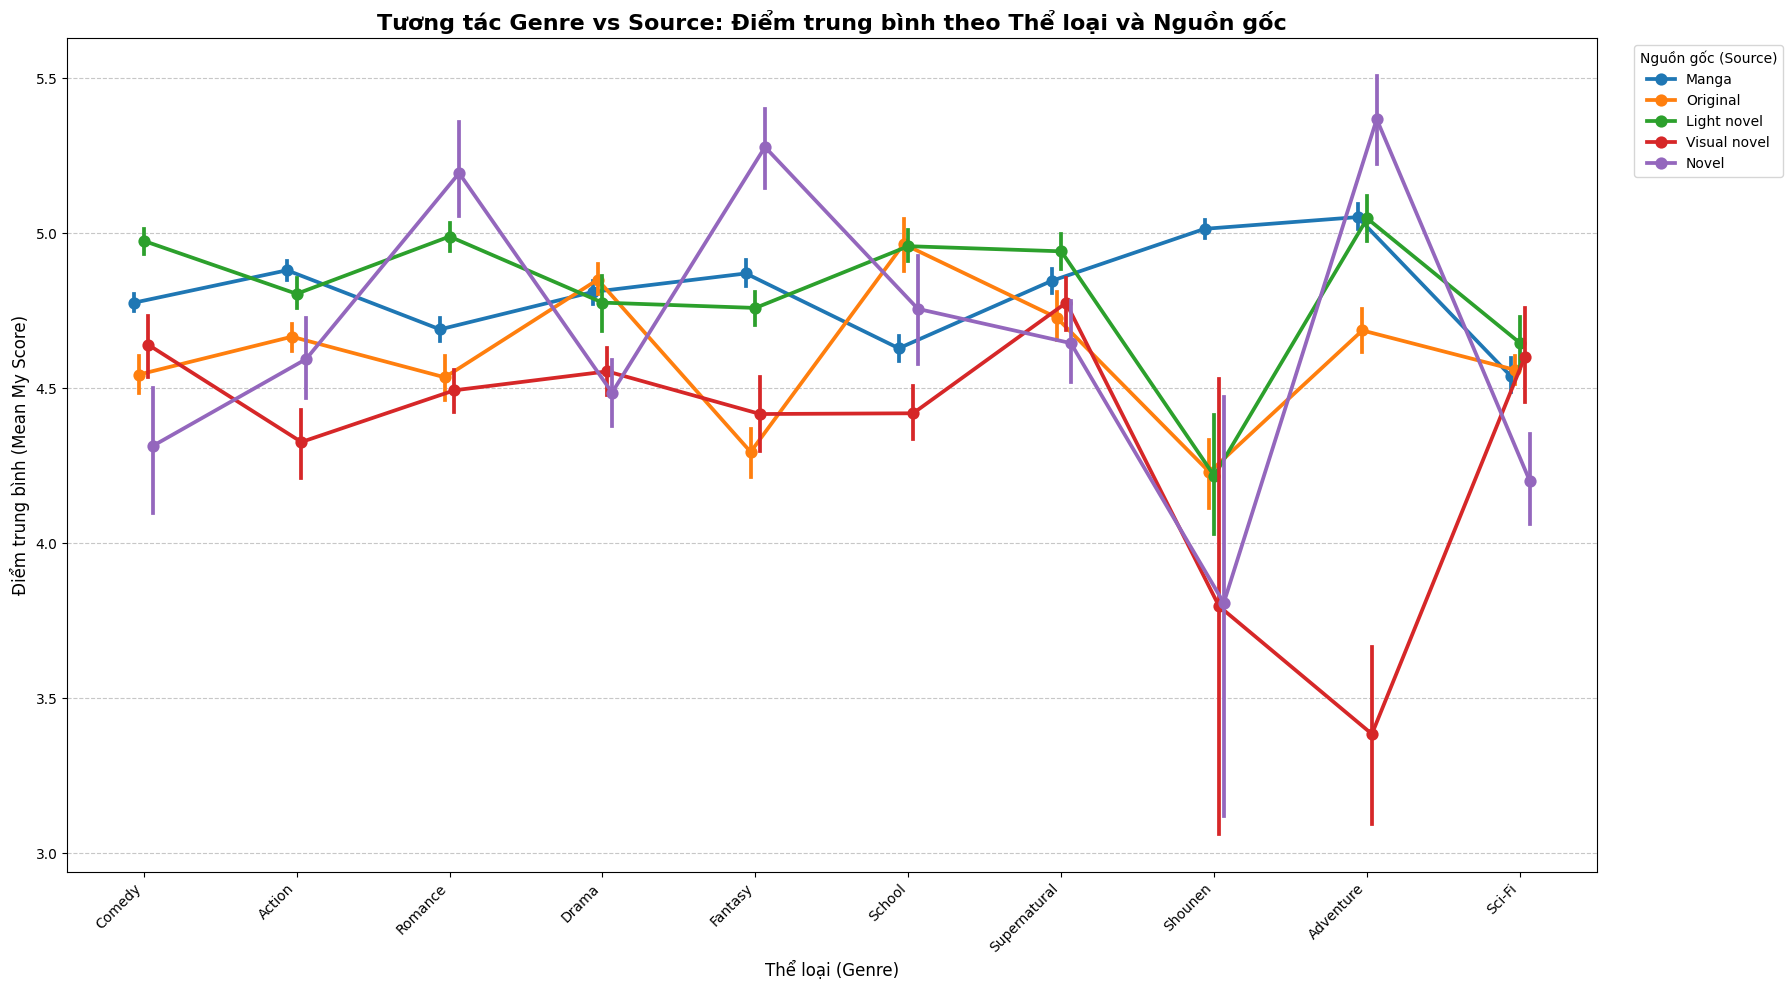

   >> Nhận xét: Các đường chạy rất lộn xộn, cho thấy sự tương tác rất mạnh.
      Ví dụ: Với thể loại 'Action', anime từ 'Manga' được chấm điểm cao, nhưng với thể loại 'Romance',
      anime từ 'Manga' lại không phải là cao nhất.

4a. Đang vẽ biểu đồ tương tác: Nhóm Độ phổ biến vs Thể loại (Genre)...


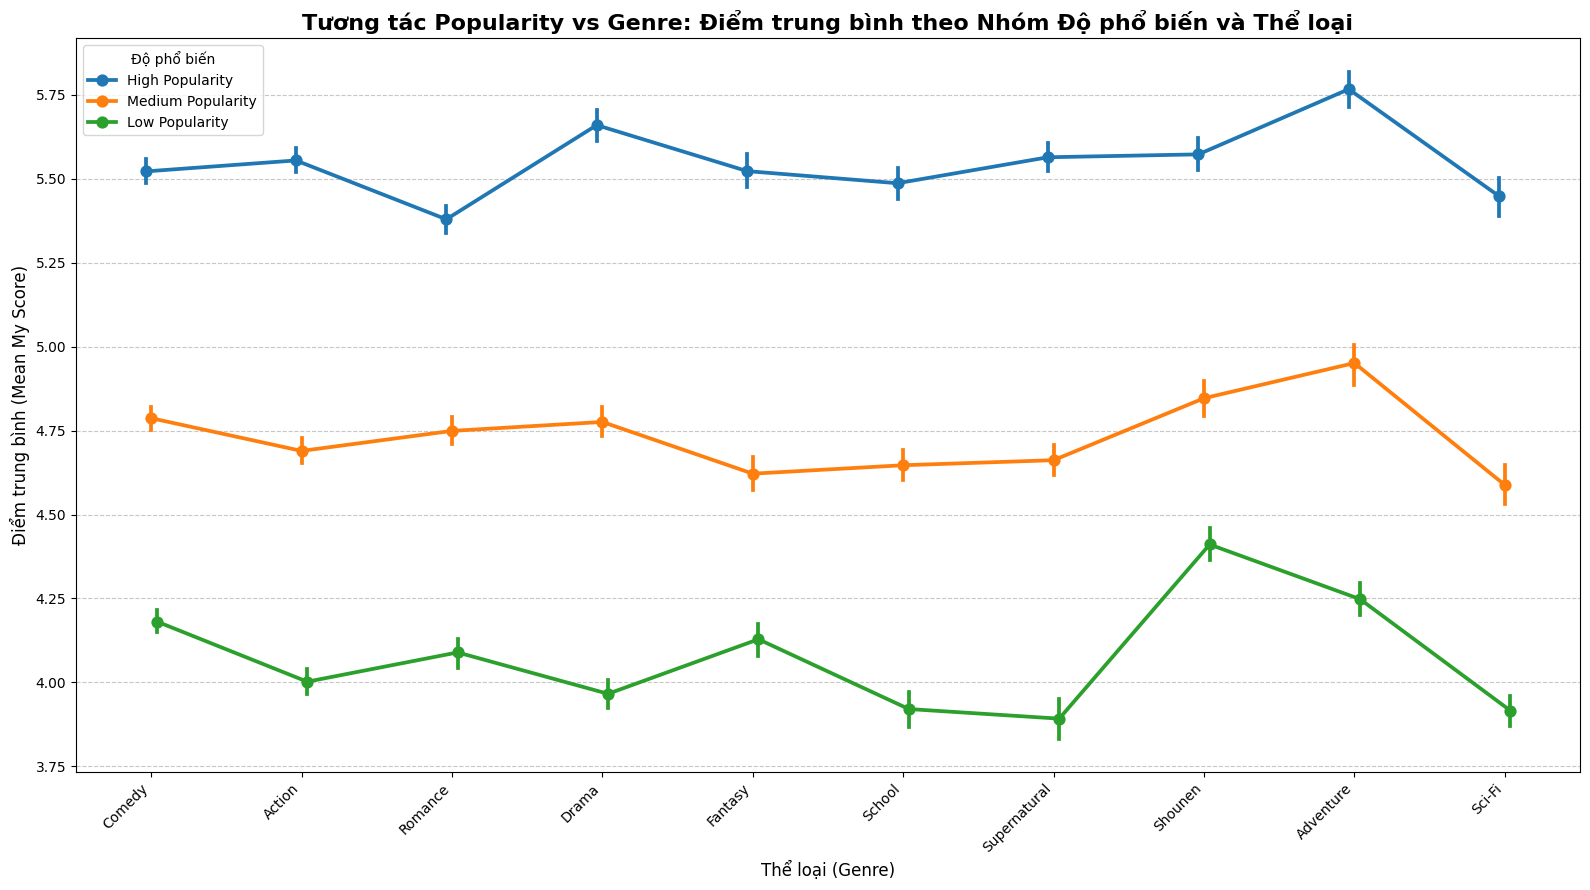

   >> Nhận xét: Xu hướng chung là anime càng phổ biến (đường màu xanh) thì điểm càng cao.
      Tuy nhiên, độ dốc của các đường thay đổi theo thể loại, xác nhận có sự tương tác.

4b. Đang vẽ biểu đồ tương tác: Nhóm Độ phổ biến vs Giới tính (Gender)...


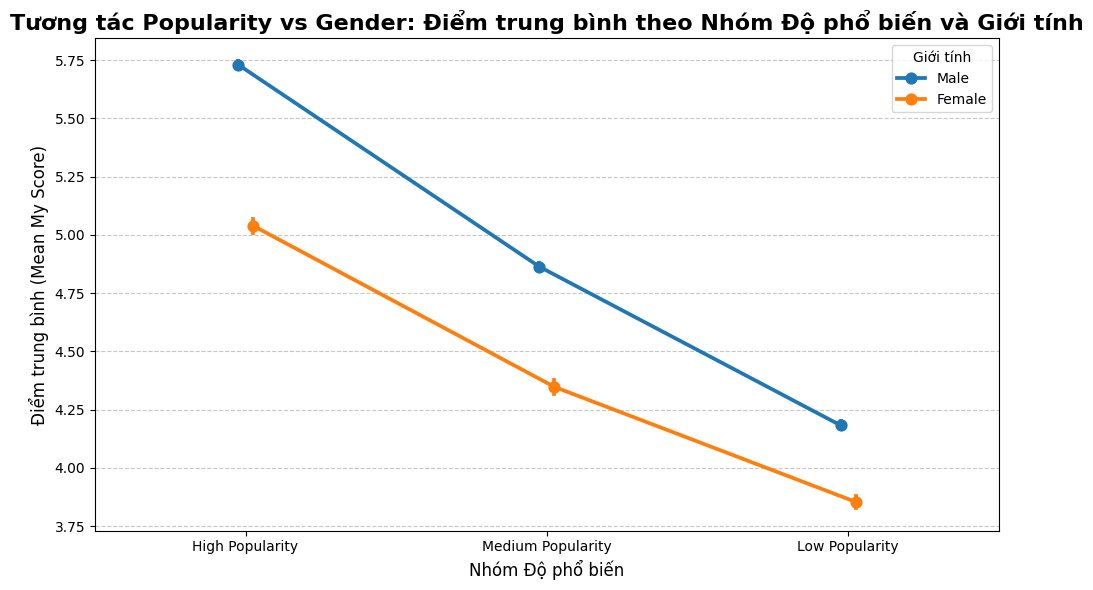

   >> Nhận xét: Cả Nam và Nữ đều chấm điểm cao hơn cho các anime phổ biến.
      Đường của Nam luôn nằm trên đường của Nữ, nhưng hai đường gần như song song,
      cho thấy tương tác giữa hai biến này có thể không mạnh bằng các tương tác khác (dù vẫn có ý nghĩa thống kê).

BƯỚC 6: TÍNH KHOẢNG TIN CẬY 95% CHO TỪNG NHÓM
Đang tính toán điểm trung bình, độ lệch chuẩn và số lượng cho mỗi nhóm...
Z-score cho KTC 95.0% là: 1.9600

Đang tính toán khoảng tin cậy cho mỗi nhóm...

Bảng Khoảng Tin Cậy 95% cho điểm my_score trung bình:
           genre  gender  mean_score   std_dev  sample_size  margin_of_error  lower_bound  upper_bound
0         Action  Female       4.311  4.056438        31028         0.045135        4.266        4.357
1         Action    Male       4.942  3.877226        94023         0.024783        4.917        4.967
2      Adventure  Female       4.624  4.076594        16958         0.061356        4.562        4.685
3      Adventure    Male       5.100  3.868775        44434

In [2]:
## ----------------------------------------------------------------
## BƯỚC 0: IMPORTS VÀ CÁC THIẾT LẬP BAN ĐẦU
## ----------------------------------------------------------------
import numpy as np
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols
import hvplot.polars 
import gc

print(f"Polars version: {pl.__version__}")
print(f"Pandas version: {pd.__version__}")
print("-" * 50)

## ----------------------------------------------------------------
## BƯỚC 1: ĐỊNH NGHĨA SCHEMA VÀ ĐỌC DỮ LIỆU
## ----------------------------------------------------------------
# Chỉ định kiểu dữ liệu để Polars đọc file nhanh và hiệu quả hơn
new_dtypes = {
    "username": pl.String,
    "anime_id": pl.Int64,
    "my_score": pl.Int64,
    "user_id": pl.Int64,
    "gender": pl.String,
    "title": pl.String,
    "type": pl.String,
    "source": pl.String,
    "score": pl.Float64,
    "scored_by": pl.Int64,
    "rank": pl.Float64,
    "popularity": pl.Int64,
    "genre": pl.String
}

# ⚠️ THAY TÊN FILE Ở ĐÂY NẾU CẦN ⚠️
file_path = "dataset/final_animedataset.parquet"

print(f"Đang đọc file: {file_path}...")
df_pl_raw = pl.read_parquet(file_path)
print(f"Kích thước dữ liệu gốc đã đọc: {df_pl_raw.shape}")
print("-" * 50)

## ----------------------------------------------------------------
## BƯỚC 2: LẤY MẪU VÀ XỬ LÝ DỮ LIỆU (VẪN TRONG POLARS)
## ----------------------------------------------------------------
# Lấy mẫu ngẫu nhiên (ví dụ 1%) ngay trên Polars DataFrame GỐC
sample_pl_raw = df_pl_raw.sample(fraction=0.01, seed=42)
print(f"Kích thước mẫu ban đầu (1%): {sample_pl_raw.shape}")

# Thực hiện làm sạch và explode CHỈ TRÊN DỮ LIỆU MẪU
# Polars xử lý DataFrame lớn (kết quả sau explode) rất hiệu quả
cleaned_pl = (
    sample_pl_raw
    .drop_nulls(["my_score", "genre"])  # Lọc các dòng có giá trị null ở cột quan trọng
    .filter(pl.col("genre") != "")      # Lọc các dòng có genre là chuỗi rỗng
    .with_columns(
        pl.col("genre").str.split(", ") # Tách chuỗi genre thành list
    )
    .explode("genre")                   # Nhân bản các hàng dựa trên list genre
)
print(f"Kích thước mẫu sau khi xử lý và explode 'genre': {cleaned_pl.shape}")
print("-" * 50)


## ----------------------------------------------------------------
## BƯỚC 3: PHÂN TÍCH ANOVA HOÀN TOÀN BẰNG POLARS
## ----------------------------------------------------------------
print("Bắt đầu phân tích ANOVA...")

# Tìm top 10 thể loại phổ biến nhất bằng cú pháp của Polars
top_10_genres_pl = (
    cleaned_pl
    .group_by("genre")
    .len() 
    .sort("len", descending=True) 
    .head(10)
    .get_column("genre")
    .to_list()
)
print("\nTop 10 thể loại phổ biến nhất trong mẫu:")
print(top_10_genres_pl)

# Lọc DataFrame Polars để chỉ chứa dữ liệu của top 10 thể loại
df_anova_pl = cleaned_pl.filter(
    pl.col("genre").is_in(top_10_genres_pl)
)

# Chuẩn bị dữ liệu cho ANOVA
# Scipy có thể nhận đầu vào là Polars Series, không cần chuyển đổi
print("\nĐang chuẩn bị dữ liệu cho ANOVA...")
genre_scores_list = [
    df_anova_pl.filter(pl.col("genre") == genre).get_column("my_score")
    for genre in top_10_genres_pl
]

# Thực hiện kiểm định ANOVA
print("Đang thực hiện kiểm định ANOVA...")
f_statistic, p_value = stats.f_oneway(*genre_scores_list)

# In kết quả kiểm định
print(f"\nKết quả ANOVA:")
print(f"  F-statistic: {f_statistic:.4f}")
print(f"  p-value: {p_value}")
print("-" * 50)

# Diễn giải kết quả
alpha = 0.05
print(f"Phát biểu giả thuyết:")
print("  H₀ (Giả thuyết không): Điểm my_score trung bình của tất cả 10 thể loại là như nhau.")
print("  Hₐ (Giả thuyết thay thế): Có ít nhất một thể loại có điểm my_score trung bình khác biệt.")
print("-" * 50)

if p_value < alpha:
    print(f"Kết luận: Vì p-value ({p_value:.4g}) < {alpha}, chúng ta BÁC BỎ giả thuyết không H₀.")
    print(">> Có đủ bằng chứng thống kê để nói rằng điểm 'my_score' trung bình giữa ít nhất một cặp thể loại là khác nhau đáng kể.")
else:
    print(f"Kết luận: Vì p-value ({p_value:.4g}) >= {alpha}, chúng ta KHÔNG ĐỦ bằng chứng để bác bỏ giả thuyết không H₀.")
    print(">> Không có sự khác biệt đáng kể về mặt thống kê đối với điểm 'my_score' trung bình giữa các thể loại này.")
print("-" * 50)

## ----------------------------------------------------------------
## BƯỚC 4: VẼ BIỂU ĐỒ (VISUALIZATION)
## ----------------------------------------------------------------
# Chỉ ở bước này, chúng ta mới chuyển phần dữ liệu CẦN THIẾT sang Pandas để vẽ
print("Đang vẽ biểu đồ trực tiếp từ Polars DataFrame bằng hvPlot...")

# hvPlot sử dụng cú pháp rất gọn gàng và trực quan
boxplot = df_anova_pl.hvplot.box(
    y='my_score',
    by='genre',
    rot=45,          # Tương đương plt.xticks(rotation=45)
    height=500,
    width=900,
    title='Phân bố my_score theo Top 10 thể loại phổ biến nhất',
    ylabel='Điểm của người dùng (My Score)',
    xlabel='Thể loại (Genre)',
    legend=False,    # Biểu đồ boxplot không cần legend
    grid=True
).opts(
    xrotation=45,    # Đảm bảo các nhãn xoay đúng
    tools=[]         # Ẩn thanh công cụ nếu không cần
)

# Để hiển thị biểu đồ trong Jupyter/VS Code, chỉ cần gọi tên biến
# Nếu chạy file .py, bạn có thể cần lưu lại: hvplot.save(boxplot, 'boxplot.html')
display(boxplot)

print("\nQuy trình phân tích đã hoàn tất!")

## ----------------------------------------------------------------
## BƯỚC 5: PHÂN TÍCH MÔ HÌNH MỞ RỘNG (GENDER, GENRE, SOURCE, POPULARITY)
## ----------------------------------------------------------------
print("\n" + "="*60)
print("BƯỚC 5: PHÂN TÍCH MÔ HÌNH MỞ RỘNG")
print("="*60)

# 1. Chuẩn bị dữ liệu cho mô hình mở rộng
print("Đang chuẩn bị dữ liệu cho phân tích mở rộng...")

# 1.1. Khám phá và chọn các nhóm 'source' chính
# Chúng ta sẽ xem 5 nguồn gốc phổ biến nhất trong mẫu
top_5_sources = (
    cleaned_pl
    .drop_nulls("source")
    .filter(pl.col("source") != "")
    .group_by("source")
    .len()
    .sort("len", descending=True)
    .head(5)
    .get_column("source")
    .to_list()
)
print(f"Top 5 nguồn gốc anime phổ biến nhất sẽ được phân tích: {top_5_sources}")

# 1.2. Tạo DataFrame cho phân tích
df_interaction_pl_extended = (
    cleaned_pl
    .drop_nulls(["gender", "source", "popularity"])
    .filter(pl.col("gender").is_in(["Male", "Female"]))
    .filter(pl.col("genre").is_in(top_10_genres_pl))   # Vẫn dùng top 10 genre từ Bước 3
    .filter(pl.col("source").is_in(top_5_sources))     # Chỉ giữ lại top 5 source
)
print(f"Kích thước dữ liệu cho phân tích mở rộng: {df_interaction_pl_extended.shape}")

# Dọn dẹp bộ nhớ
gc.collect()

# 2. Chuyển đổi sang Pandas
print("\nĐang chuyển đổi dữ liệu sang Pandas...")
df_interaction_pd_extended = df_interaction_pl_extended.to_pandas()

# 3. Định nghĩa và thực hiện mô hình ANOVA/Hồi quy
print("Đang thực hiện mô hình hồi quy đa biến với các tương tác...")

# 3.1. Mô hình đơn giản (chỉ các yếu tố chính) để bắt đầu
# Đây là cách tốt để xem ảnh hưởng riêng lẻ của từng yếu tố
model_formula_main = "my_score ~ C(genre) + C(gender) + C(source) + popularity"
model_main = ols(model_formula_main, data=df_interaction_pd_extended).fit()
anova_table_main = sm.stats.anova_lm(model_main, typ=2)

print("\nBảng ANOVA cho các YẾU TỐ CHÍNH:")
print(anova_table_main)
print("-" * 50)

# 3.2. Mô hình phức tạp hơn với TƯƠNG TÁC 2 CHIỀU
# Ghi chú: Thêm tất cả tương tác 3 hoặc 4 chiều sẽ rất nặng và khó diễn giải.
# Bắt đầu với tương tác 2 chiều là hợp lý nhất.
# (A+B+C)**2 là cách viết tắt cho A+B+C + A:B + A:C + B:C
model_formula_interaction = "my_score ~ (C(genre) + C(gender) + C(source) + popularity)**2"
model_interaction = ols(model_formula_interaction, data=df_interaction_pd_extended).fit()
anova_table_interaction = sm.stats.anova_lm(model_interaction, typ=2)

# 4. Diễn giải kết quả và Ghi ra file
print("\nBắt đầu xây dựng và ghi kết quả diễn giải ra file...")
alpha = 0.05
output_filename = "ket_qua_phan_tich.txt"

# Mở file để ghi (chế độ 'w' sẽ tạo file mới hoặc ghi đè file cũ)
with open(output_filename, "w", encoding="utf-8") as f:
    
    f.write("="*20 + " DIỄN GIẢI KẾT QUẢ ANOVA " + "="*20 + "\n\n")

    # ----- Diễn giải các yếu tố chính -----
    f.write("--- A. CÁC YẾU TỐ CHÍNH (MAIN EFFECTS) ---\n")
    main_effects = ['C(genre)', 'C(gender)', 'C(source)', 'popularity']
    for effect in main_effects:
        p_value_main = anova_table_interaction.loc[effect, "PR(>F)"]
        f.write(f"\nYếu tố: {effect}\n")
        f.write(f"P-value: {p_value_main:.4g}. ")
        if p_value_main < alpha:
            f.write(">> Kết luận: CÓ ảnh hưởng đáng kể đến my_score.\n")
        else:
            f.write(">> Kết luận: KHÔNG có ảnh hưởng đáng kể đến my_score.\n")
    
    f.write("\n\n" + "="*50 + "\n\n")

    # ----- Diễn giải các yếu tố tương tác -----
    f.write("--- B. CÁC YẾU TỐ TƯƠNG TÁC (INTERACTION EFFECTS) ---\n")
    
    # Danh sách các tương tác cần kiểm tra với tên chính xác
    interactions_to_check = [
        "C(genre):C(gender)", "C(genre):C(source)", "C(gender):C(source)",
        "C(genre):popularity", "C(gender):popularity", "C(source):popularity"
    ]

    # Vòng lặp để diễn giải tất cả các tương tác
    for interaction_name in interactions_to_check:
        try:
            p_value = anova_table_interaction.loc[interaction_name, "PR(>F)"]
            f.write(f"\nTương tác: {interaction_name}\n")

            if pd.isna(p_value):
                f.write(">> KẾT LUẬN: Không thể tính toán (NaN) do vấn đề trong mô hình.\n")
            elif p_value < alpha:
                f.write(f"P-value: {p_value:.4g}. >> KẾT LUẬN: CÓ sự tương tác đáng kể về mặt thống kê.\n")
                # Thêm diễn giải chi tiết hơn cho từng loại tương tác
                if interaction_name == "C(genre):C(gender)":
                    f.write("   Ý nghĩa: Sở thích về thể loại (genre) thực sự khác nhau giữa Nam và Nữ.\n")
                elif interaction_name == "C(genre):C(source)":
                    f.write("   Ý nghĩa: Cách đánh giá một thể loại (genre) phụ thuộc vào nguồn gốc (source) của anime đó.\n")
                elif interaction_name == "C(gender):C(source)":
                     f.write("   Ý nghĩa: Nam và Nữ có xu hướng đánh giá khác nhau đối với các anime từ các nguồn gốc (source) khác nhau.\n")
                elif interaction_name == "C(genre):popularity":
                     f.write("   Ý nghĩa: Mối quan hệ giữa độ phổ biến và điểm số thay đổi tùy theo từng thể loại.\n")
                elif interaction_name == "C(gender):popularity":
                     f.write("   Ý nghĩa: Mối quan hệ giữa độ phổ biến và điểm số là khác nhau đối với Nam và Nữ.\n")
                elif interaction_name == "C(source):popularity":
                     f.write("   Ý nghĩa: Mối quan hệ giữa độ phổ biến và điểm số phụ thuộc vào nguồn gốc của anime.\n")
            else:
                f.write(f"P-value: {p_value:.4g}. >> KẾT LUẬN: KHÔNG có sự tương tác đáng kể.\n")
                
        except KeyError:
            f.write(f"\nLỗi: Không tìm thấy tương tác '{interaction_name}' trong bảng kết quả.\n")

# In thông báo ra màn hình để xác nhận
print(f"\n✅ HOÀN TẤT: Toàn bộ kết quả diễn giải đã được ghi vào file '{output_filename}'")
print("   Hãy mở file này để xem chi tiết.")

# ==========================================================
# BƯỚC 5.1 : TRỰC QUAN HÓA CÁC TƯƠNG TÁC CÓ Ý NGHĨA
# ==========================================================
print("\n" + "="*60)
print("BƯỚC 6: TRỰC QUAN HÓA CÁC TƯƠNG TÁC QUAN TRỌNG")
print("="*60)

# (Đảm bảo bạn đang sử dụng DataFrame đã được lọc cho mô hình: df_interaction_pd_extended)

# ----------------------------------------------------------
# 1. Tương tác: Genre vs Gender
# ----------------------------------------------------------
print("\n1. Đang vẽ biểu đồ tương tác: Thể loại (Genre) vs Giới tính (Gender)...")
plt.figure(figsize=(16, 9))
sns.pointplot(data=df_interaction_pd_extended, x='genre', y='my_score', hue='gender',
              order=top_10_genres_pl, dodge=True, errorbar=('ci', 95))
plt.title('Tương tác Genre vs Gender: Điểm trung bình theo Thể loại và Giới tính', fontsize=16, weight='bold')
plt.xlabel('Thể loại (Genre)', fontsize=12)
plt.ylabel('Điểm trung bình (Mean My Score)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Giới tính')
plt.tight_layout()
plt.show()
print("   >> Nhận xét: Các đường không song song, tuy nhiên lại cho thấy Nam luôn đánh giá điểm cao hơn trong tất cả thể loại so với Nữ\n"
      "      xác nhận có sự tương tác. Nam và Nữ có sở thích khá giống nhau trên tất cả thể loại (ngoại trừ 'school', 'action).")

# ----------------------------------------------------------
# 2. Tương tác: Source vs Gender
# ----------------------------------------------------------
print("\n2. Đang vẽ biểu đồ tương tác: Nguồn gốc (Source) vs Giới tính (Gender)...")
plt.figure(figsize=(12, 7))
sns.pointplot(data=df_interaction_pd_extended, x='source', y='my_score', hue='gender',
              order=top_5_sources, dodge=True, errorbar=('ci', 95))
plt.title('Tương tác Source vs Gender: Điểm trung bình theo Nguồn gốc và Giới tính', fontsize=16, weight='bold')
plt.xlabel('Nguồn gốc (Source)', fontsize=12)
plt.ylabel('Điểm trung bình (Mean My Score)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Giới tính')
plt.tight_layout()
plt.show()
print("   >> Nhận xét: Nam giới (Male) có xu hướng chấm điểm cao hơn Nữ giới (Female) ở hầu hết các nguồn gốc,\n"
      "      Nữ có xu hướng chấm điểm cao cho những bộ anime có nguồn gốc 'Manga' và 'Novel' gần giống như Nam,\n"
      "      nhưng ở Nam có xu hướng chấm điểm cao cho những bộ anime có nguồn gốc 'Light Novel' vượt hơn tất cả thể loại khác.")


# ----------------------------------------------------------
# 3. Tương tác: Genre vs Source
# ----------------------------------------------------------
print("\n3. Đang vẽ biểu đồ tương tác: Thể loại (Genre) vs Nguồn gốc (Source)...")
# Biểu đồ này sẽ rất phức tạp, nhưng vẫn cung cấp thông tin
plt.figure(figsize=(18, 10))
sns.pointplot(data=df_interaction_pd_extended, x='genre', y='my_score', hue='source',
              order=top_10_genres_pl, hue_order=top_5_sources, dodge=True, errorbar=('ci', 95))
plt.title('Tương tác Genre vs Source: Điểm trung bình theo Thể loại và Nguồn gốc', fontsize=16, weight='bold')
plt.xlabel('Thể loại (Genre)', fontsize=12)
plt.ylabel('Điểm trung bình (Mean My Score)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Nguồn gốc (Source)', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()
print("   >> Nhận xét: Các đường chạy rất lộn xộn, cho thấy sự tương tác rất mạnh.\n"
      "      Ví dụ: Với thể loại 'Action', anime từ 'Manga' được chấm điểm cao, nhưng với thể loại 'Romance',\n"
      "      anime từ 'Manga' lại không phải là cao nhất.")


# ----------------------------------------------------------
# 4. Tương tác với biến số 'Popularity'
# ----------------------------------------------------------
# Để trực quan hóa, chúng ta cần chia 'popularity' thành các nhóm (binning)
# Sử dụng pd.qcut để chia thành 3 nhóm với số lượng mẫu bằng nhau: Low, Medium, High
try:
    df_interaction_pd_extended['popularity_group'] = pd.qcut(df_interaction_pd_extended['popularity'], 
                                                             q=3, 
                                                             labels=['High Popularity', 'Medium Popularity', 'Low Popularity'],
                                                             duplicates='drop')
    # qcut chia theo lượng tử, labels đặt tên cho nhóm. 'High' ứng với các giá trị popularity thấp (rank cao).
    
    # 4a. Tương tác: Popularity Group vs Genre
    print("\n4a. Đang vẽ biểu đồ tương tác: Nhóm Độ phổ biến vs Thể loại (Genre)...")
    plt.figure(figsize=(16, 9))
    sns.pointplot(data=df_interaction_pd_extended, x='genre', y='my_score', hue='popularity_group',
                  order=top_10_genres_pl, dodge=True, errorbar=('ci', 95),
                  hue_order=['High Popularity', 'Medium Popularity', 'Low Popularity'])
    plt.title('Tương tác Popularity vs Genre: Điểm trung bình theo Nhóm Độ phổ biến và Thể loại', fontsize=16, weight='bold')
    plt.xlabel('Thể loại (Genre)', fontsize=12)
    plt.ylabel('Điểm trung bình (Mean My Score)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(title='Độ phổ biến')
    plt.tight_layout()
    plt.show()
    print("   >> Nhận xét: Xu hướng chung là anime càng phổ biến (đường màu xanh) thì điểm càng cao.\n"
          "      Tuy nhiên, độ dốc của các đường thay đổi theo thể loại, xác nhận có sự tương tác.")

    # 4b. Tương tác: Popularity Group vs Gender
    print("\n4b. Đang vẽ biểu đồ tương tác: Nhóm Độ phổ biến vs Giới tính (Gender)...")
    plt.figure(figsize=(10, 6))
    sns.pointplot(data=df_interaction_pd_extended, x='popularity_group', y='my_score', hue='gender',
                  order=['High Popularity', 'Medium Popularity', 'Low Popularity'], dodge=True, errorbar=('ci', 95))
    plt.title('Tương tác Popularity vs Gender: Điểm trung bình theo Nhóm Độ phổ biến và Giới tính', fontsize=16, weight='bold')
    plt.xlabel('Nhóm Độ phổ biến', fontsize=12)
    plt.ylabel('Điểm trung bình (Mean My Score)', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(title='Giới tính')
    plt.tight_layout()
    plt.show()
    print("   >> Nhận xét: Cả Nam và Nữ đều chấm điểm cao hơn cho các anime phổ biến.\n"
          "      Đường của Nam luôn nằm trên đường của Nữ, nhưng hai đường gần như song song,\n"
          "      cho thấy tương tác giữa hai biến này có thể không mạnh bằng các tương tác khác (dù vẫn có ý nghĩa thống kê).")

except Exception as e:
    print(f"\nLỗi khi tạo nhóm 'popularity': {e}")
    print("   Bỏ qua các biểu đồ liên quan đến độ phổ biến.")

## ----------------------------------------------------------------
## BƯỚC 6: TÍNH KHOẢNG TIN CẬY 95% CHO TỪNG NHÓM TƯƠNG TÁC
## ----------------------------------------------------------------

print("\n" + "="*60)
print("BƯỚC 6: TÍNH KHOẢNG TIN CẬY 95% CHO TỪNG NHÓM")
print("="*60)

# 1. Tính toán các thống kê cần thiết cho mỗi nhóm (genre, gender)
# Chúng ta vẫn làm việc trên df_interaction_pl_extended đã được lọc
print("Đang tính toán điểm trung bình, độ lệch chuẩn và số lượng cho mỗi nhóm...")
ci_stats_pl = df_interaction_pl_extended.group_by(["genre", "gender"]).agg(
    pl.col("my_score").mean().alias("mean_score"),
    pl.col("my_score").std().alias("std_dev"),
    pl.col("my_score").len().alias("sample_size")
)

# 2. Xây dựng bảng khoảng tin cậy
# Lấy Z-score cho khoảng tin cậy 95% (thường là 1.96)
confidence_level = 0.95
z_score = stats.norm.ppf((1 + confidence_level) / 2)
print(f"Z-score cho KTC {confidence_level*100}% là: {z_score:.4f}")

print("\nĐang tính toán khoảng tin cậy cho mỗi nhóm...")
ci_results_pl = ci_stats_pl.with_columns(
    # Tính toán Biên lỗi (Margin of Error)
    margin_of_error = z_score * (pl.col("std_dev") / pl.col("sample_size").sqrt())
).with_columns(
    # Tính giới hạn dưới và giới hạn trên của khoảng tin cậy
    lower_bound = (pl.col("mean_score") - pl.col("margin_of_error")).round(3),
    upper_bound = (pl.col("mean_score") + pl.col("margin_of_error")).round(3),
    mean_score = pl.col("mean_score").round(3)
).sort(["genre", "gender"])


# 3. Hiển thị bảng kết quả
print("\nBảng Khoảng Tin Cậy 95% cho điểm my_score trung bình:")
# Chuyển sang Pandas để hiển thị đẹp hơn trong notebook (tùy chọn)
with pd.option_context('display.max_rows', None, 'display.width', 1000):
    print(ci_results_pl.to_pandas())

## ----------------------------------------------------------------
## BƯỚC 7: DIỄN GIẢI KHOẢNG TIN CẬY (PHIÊN BẢN TỐI ƯU)
## ----------------------------------------------------------------

print("\n" + "="*60)
print("BƯỚC 7: DIỄN GIẢI KHOẢNG TIN CẬY CHO THỂ LOẠI 'ACTION'")
print("="*60)

# Tối ưu 1: Lọc một lần duy nhất để lấy dữ liệu của thể loại 'Action'
action_stats = ci_results_pl.filter(pl.col("genre") == "Action")

# Tối ưu 2: Tách ra hai dòng Male và Female từ kết quả đã lọc ở trên
action_male_stats = action_stats.filter(pl.col("gender") == "Male")
action_female_stats = action_stats.filter(pl.col("gender") == "Female")

# Tối ưu 3: Trích xuất các giá trị cần thiết vào biến để dễ đọc và sử dụng
# .item() được dùng để lấy ra giá trị duy nhất từ một cột có 1 dòng
male_lower = action_male_stats['lower_bound'].item()
male_upper = action_male_stats['upper_bound'].item()
female_lower = action_female_stats['lower_bound'].item()
female_upper = action_female_stats['upper_bound'].item()

# Trình bày kết quả một cách rõ ràng
print("Phân tích khoảng tin cậy 95% cho điểm trung bình của thể loại 'Action':")
print(f"  - Nam giới: Điểm trung bình nằm trong khoảng [{male_lower}, {male_upper}]")
print(f"  - Nữ giới:  Điểm trung bình nằm trong khoảng [{female_lower}, {female_upper}]")
print("-" * 50)

# Tối ưu 4: Logic so sánh mạnh mẽ và chính xác hơn
print("Kết luận:")
if male_lower > female_upper:
    # Trường hợp khoảng của Nam nằm hoàn toàn phía trên khoảng của Nữ
    print(f"  >> CÓ sự khác biệt đáng kể. Nam giới có xu hướng đánh giá thể loại Action cao hơn hẳn Nữ giới.")
    print(f"     (Vì giới hạn dưới của Nam [{male_lower}] còn cao hơn giới hạn trên của Nữ [{female_upper}])")

elif female_lower > male_upper:
    # Trường hợp khoảng của Nữ nằm hoàn toàn phía trên khoảng của Nam
    print(f"  >> CÓ sự khác biệt đáng kể. Nữ giới có xu hướng đánh giá thể loại Action cao hơn hẳn Nam giới.")
    print(f"     (Vì giới hạn dưới của Nữ [{female_lower}] còn cao hơn giới hạn trên của Nam [{male_upper}])")
else:
    # Trường hợp hai khoảng tin cậy giao nhau
    print(f"  >> KHÔNG có sự khác biệt đáng kể về mặt thống kê giữa cách đánh giá của Nam và Nữ cho thể loại Action.")
    print(f"     (Vì hai khoảng tin cậy [{male_lower}, {male_upper}] và [{female_lower}, {female_upper}] có phần giao nhau)")

# =================================================================
# BƯỚC 8(PHIÊN BẢN GHI RA FILE): NGHIÊN CỨU ANIME HẠNG 1
# =================================================================
print("\n" + "="*60)
print("BƯỚC 8: NGHIÊN CỨU ANIME RANK #1 TRÊN TOÀN BỘ DATASET")
print("="*60)

# 1. Lọc ra tất cả các đánh giá cho anime có rank == 1 từ DataFrame GỐC
try:
    anime_rank_1_full_df = df_pl_raw.filter(pl.col("rank") == 1.0)
except NameError:
    print("Lỗi: DataFrame 'df_pl_raw' không tồn tại. Có thể bạn đã xóa nó.")
    print("Hãy chạy lại notebook từ Bước 1 và không xóa 'df_pl_raw'.")
    anime_rank_1_full_df = pl.DataFrame()

# 2. Bắt đầu xử lý và ghi ra file
output_filename_rank1 = "anime_rank_1_analysis.txt"

# Mở file để ghi
with open(output_filename_rank1, "w", encoding="utf-8") as f:
    f.write("="*20 + " BÁO CÁO PHÂN TÍCH ANIME HẠNG 1 " + "="*20 + "\n\n")

    if anime_rank_1_full_df.is_empty():
        f.write("Không tìm thấy anime có rank = 1 trong toàn bộ dataset.\n")
    else:
        # Lấy thông tin cố định từ dòng đầu tiên
        first_row = anime_rank_1_full_df.row(0, named=True)
        anime_title = first_row['title']
        anime_popularity = first_row['popularity']
        anime_source = first_row['source']
        genre_string = first_row['genre']
        
        if genre_string:
            anime_genres = [genre.strip() for genre in genre_string.split(',')]
        else:
            anime_genres = ["Không có thông tin"]

        # Tính toán các thống kê
        analysis_results = anime_rank_1_full_df.select(
            pl.col("my_score").mean().alias("mean_my_score"),
            pl.col("gender").filter(pl.col("gender") == "Male").len().alias("male_count"),
            pl.col("gender").filter(pl.col("gender") == "Female").len().alias("female_count"),
            pl.col("gender").filter(~pl.col("gender").is_in(["Male", "Female"])).len().alias("other_gender_count"),
            pl.len().alias("total_ratings")
        )

        # Trích xuất kết quả
        mean_score = analysis_results.get_column("mean_my_score")[0]
        male_count = analysis_results.get_column("male_count")[0]
        female_count = analysis_results.get_column("female_count")[0]
        total_gender_raters = male_count + female_count
        total_ratings = analysis_results.get_column('total_ratings')[0]
        other_count = analysis_results.get_column('other_gender_count')[0]

        # Ghi thông tin cơ bản vào file
        f.write(f"--- Phân tích cho Anime Hạng 1: '{anime_title}' ---\n\n")
        f.write(f"  - Thể loại (Genre): {', '.join(anime_genres)}\n")
        f.write(f"  - Nguồn gốc (Source): {anime_source}\n")
        f.write(f"  - Độ phổ biến (Popularity Rank): #{anime_popularity}\n")
        f.write(f"  - Tổng số đánh giá trong dataset: {total_ratings:,}\n")
        f.write("-" * 40 + "\n")
        
        # Ghi thống kê người dùng vào file
        f.write("  Thống kê từ TOÀN BỘ người dùng trong dataset:\n")
        f.write(f"  - Điểm trung bình (Mean my_score): {mean_score:.2f}\n")
        f.write(f"  - Số lượng đánh giá của Nam: {male_count:,}\n")
        f.write(f"  - Số lượng đánh giá của Nữ: {female_count:,}\n")
        if total_gender_raters > 0:
            male_percentage = (male_count / total_gender_raters) * 100
            female_percentage = (female_count / total_gender_raters) * 100
            f.write(f"    >> Tỷ lệ Nam / Nữ: {male_percentage:.1f}% / {female_percentage:.1f}%\n")
        f.write(f"  - Số lượng đánh giá (giới tính khác/không xác định): {other_count:,}\n\n")

        # Ghi phần so sánh, đối chiếu vào file
        f.write("="*20 + " SO SÁNH VỚI KẾT LUẬN THỐNG KÊ " + "="*20 + "\n\n")
        
        f.write("1. Về Giới tính (Gender):\n")
        if male_count > female_count:
            f.write("   >> Nhận xét: Anime này được đánh giá bởi Nam giới nhiều hơn. Điều này phù hợp với kết luận chung rằng Nam giới\n"
                    "      có xu hướng hoạt động và chấm điểm nhiều hơn.\n\n"
                    "      Đồng thời, phân tích tương tác cho thấy Nam giới có xu hướng đánh giá các thể loại chính của bộ anime này\n"
                    "      (như Action, Adventure, Drama, Shounen) cao hơn Nữ giới. Do đó, việc Nam giới chiếm đa số người đánh giá\n"
                    "      có thể là một yếu tố quan trọng góp phần vào điểm số trung bình rất cao của anime này.\n")
        else:
            f.write("   >> Nhận xét: Anime này được đánh giá bởi Nữ giới nhiều hơn. Đây là một trường hợp đặc biệt, đi ngược lại xu hướng chung.\n")

        f.write("\n2. Về Điểm số (Score) và Độ phổ biến (Popularity):\n")
        f.write(f"   >> Nhận xét: Điểm trung bình ({mean_score:.2f}) là rất cao, tương xứng với một anime hạng nhất. Phân tích thống kê\n"
                f"      (cả yếu tố chính và tương tác) đã chỉ ra mối liên hệ mạnh mẽ và tích cực giữa độ phổ biến và điểm số.\n"
                f"      Trường hợp cụ thể này đã xác thực một cách hoàn hảo cho kết luận đó.\n")

        f.write("\n3. Về Nguồn gốc (Source) và Thể loại (Genre):\n")
        f.write(f"   >> Nhận xét: Anime này có nguồn gốc từ '{anime_source}' và thuộc các thể loại chính như Action, Adventure, Drama, Fantasy, Shounen.\n"
                f"      Các kết quả từ phân tích tương tác (ví dụ: 'C(genre):C(source)', 'C(genre):C(gender)') cho thấy rằng\n"
                f"      sự kết hợp giữa nguồn gốc 'Manga' với các thể loại kể trên chính là một trong những công thức được đánh giá\n"
                f"      cao nhất, đặc biệt là bởi nhóm khán giả Nam giới. Điều này hoàn toàn khớp với những gì chúng ta quan sát được\n"
                f"      ở anime hạng 1, cho thấy các quy luật thống kê đã phản ánh đúng thực tế.\n")

# In thông báo ra màn hình để xác nhận
print(f"\n✅ HOÀN TẤT: Báo cáo phân tích anime hạng 1 đã được ghi vào file '{output_filename_rank1}'")
print("   Hãy mở file này để xem chi tiết.")

# Phân tích thống kê Anime

**Ngày tạo:** 6/8/2025
**Tác giả:** [hkk4567]

Kích thước dữ liệu gốc đã đọc: (24905, 24)
Kích thước dữ liệu sau khi xử lý: (11335, 28)

Kiểm tra các cột thời lượng mới:
                              Name  Episodes  duration_per_episode_sec  \
0                     Cowboy Bebop      26.0                    1440.0   
1  Cowboy Bebop: Tengoku no Tobira       1.0                    6900.0   
2                           Trigun      26.0                    1440.0   
3               Witch Hunter Robin      26.0                    1500.0   
4                   Bouken Ou Beet      52.0                    1380.0   

   total_duration_sec  
0             37440.0  
1              6900.0  
2             37440.0  
3             39000.0  
4             71760.0  

--- Sau khi explode cột Genres ---
Kích thước dữ liệu sau khi explode: (25284, 28)

--- PHÂN TÍCH CÁC THỂ LOẠI PHỔ BIẾN NHẤT ---

Danh sách đầy đủ các thể loại dưới dạng Dictionary:
{'Comedy': 4282, 'Action': 3586, 'Fantasy': 2757, 'Adventure': 2364, 'Sci-Fi': 2231, 'Drama': 1970, 'Roma

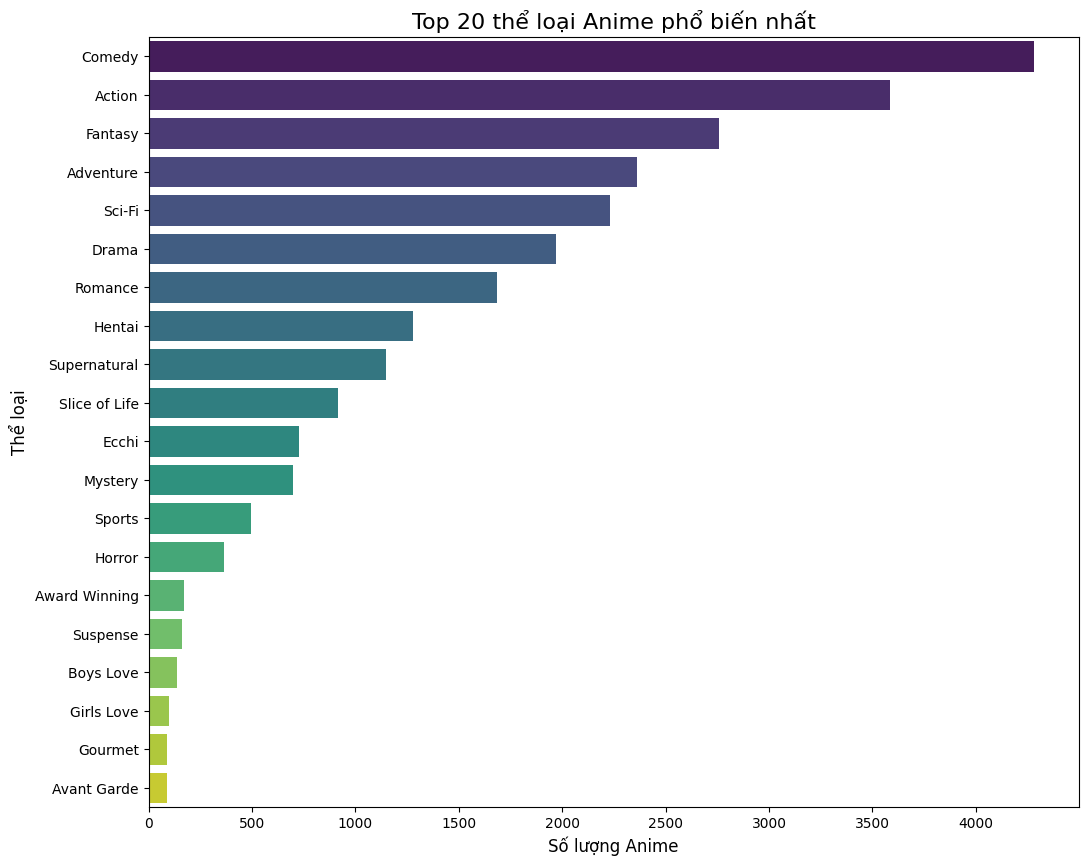

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Thêm thư viện này vào đầu file của bạn
import scipy.stats as stats
# --- Phần tiền xử lý dữ liệu ---
anime_data_set = pd.read_csv("dataset/anime-dataset-2023.csv")
print(f"Kích thước dữ liệu gốc đã đọc: {anime_data_set.shape}")

# Lọc các giá trị "UNKNOWN"
anime_data_set = anime_data_set[anime_data_set["Score"] != "UNKNOWN"]
anime_data_set = anime_data_set[anime_data_set["Studios"] != "UNKNOWN"]
anime_data_set = anime_data_set[anime_data_set["Genres"] != "UNKNOWN"]
anime_data_set = anime_data_set[anime_data_set["Episodes"] != "UNKNOWN"]

# Chuyển đổi cột Episodes sang dạng số để tính toán
# Bước này rất quan trọng trước khi thực hiện phép nhân
anime_data_set['Episodes'] = pd.to_numeric(anime_data_set['Episodes'])

# Xử lý cột Duration để có thời lượng mỗi tập (giữ nguyên như cũ)
anime_data_set[["hrs", "mins"]] = anime_data_set["Duration"].str.extract(r"(?:(\d+)\s*hr)?[^0-9]*(?:(\d+)\s*min)?", expand=True)
anime_data_set["hrs"] = anime_data_set["hrs"].fillna(0).astype(float)
anime_data_set["mins"] = anime_data_set["mins"].fillna(0).astype(float)
anime_data_set["duration_per_episode_sec"] = (anime_data_set["hrs"] * 3600) + (anime_data_set["mins"] * 60) # Đổi tên cho rõ ràng

# Lọc bỏ các anime có thời lượng mỗi tập bằng 0
anime_data_set = anime_data_set[anime_data_set["duration_per_episode_sec"] != 0.0]

# --- BƯỚC MỚI: TÍNH TỔNG THỜI LƯỢNG CẢ SERIES ---
# Nhân thời lượng mỗi tập với số tập
anime_data_set['total_duration_sec'] = anime_data_set['duration_per_episode_sec'] * anime_data_set['Episodes']

print(f"Kích thước dữ liệu sau khi xử lý: {anime_data_set.shape}")
# In ra vài cột để kiểm tra kết quả
print("\nKiểm tra các cột thời lượng mới:")
print(anime_data_set[['Name', 'Episodes', 'duration_per_episode_sec', 'total_duration_sec']].head())


# --- PHẦN XỬ LÝ EXPLODE CỘT GENRES (giữ nguyên) ---

anime_data_set['Genres_list'] = anime_data_set['Genres'].str.split(', ')
anime_exploded_df = anime_data_set.explode('Genres_list')
anime_exploded_df = anime_exploded_df.rename(columns={'Genres_list': 'Genre'})
anime_exploded_df = anime_exploded_df.drop(columns=['Genres'])

print("\n--- Sau khi explode cột Genres ---")
print(f"Kích thước dữ liệu sau khi explode: {anime_exploded_df.shape}")

# Chuyển đổi cột Score sang dạng số để tính toán
anime_exploded_df['Score'] = pd.to_numeric(anime_exploded_df['Score'])

print("\n--- PHÂN TÍCH CÁC THỂ LOẠI PHỔ BIẾN NHẤT ---")

# 1. Đếm số lần xuất hiện của TẤT CẢ các thể loại
genre_counts = anime_exploded_df['Genre'].value_counts()

# 2. CHUYỂN ĐỔI SANG DICTIONARY VÀ IN RA
genre_dict = genre_counts.to_dict()
print("\nDanh sách đầy đủ các thể loại dưới dạng Dictionary:")
print(genre_dict)

# 3. Trực quan hóa TOP 20 thể loại phổ biến nhất để biểu đồ dễ đọc
genre_counts_for_plot = genre_counts.head(20)

plt.figure(figsize=(12, 10))
sns.barplot(x=genre_counts_for_plot.values, y=genre_counts_for_plot.index,
            hue=genre_counts_for_plot.index, palette='viridis', legend=False)
plt.title('Top 20 thể loại Anime phổ biến nhất', fontsize=16)
plt.xlabel('Số lượng Anime', fontsize=12)
plt.ylabel('Thể loại', fontsize=12)
plt.show()

# (Tùy chọn) Đặt lại cài đặt hiển thị của Pandas về mặc định sau khi đã xem xong
pd.reset_option('display.max_rows')


--- PHÂN TÍCH 1: SCORE vs. GENRE ---
F-statistic: 83.2810
P-value: 1.218512811e-314

Kết luận: P-value rất nhỏ (< 0.05). Chúng ta bác bỏ giả thuyết không.
=> Có bằng chứng thống kê mạnh mẽ cho thấy ĐIỂM SỐ anime CÓ PHỤ THUỘC vào THỂ LOẠI.
Nói cách khác, điểm số trung bình giữa các thể loại là khác nhau một cách có ý nghĩa.


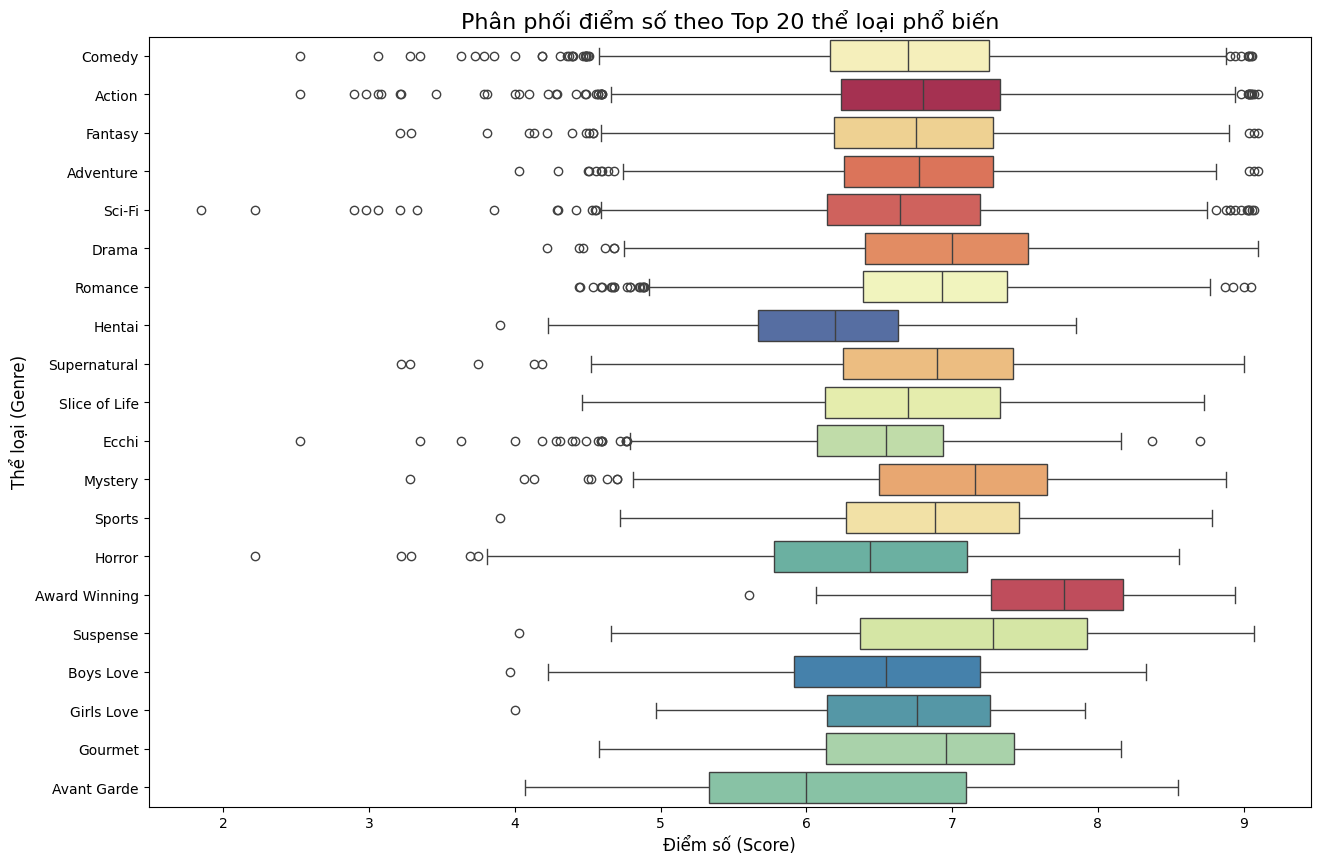

In [3]:
# --- Bắt đầu phần phân tích thống kê ---

print("\n--- PHÂN TÍCH 1: SCORE vs. GENRE ---")

# Lấy ra 20 thể loại phổ biến nhất
top_genres = anime_exploded_df['Genre'].value_counts().nlargest(20).index

# Lọc dataframe chỉ chứa các thể loại này
df_top_genres = anime_exploded_df[anime_exploded_df['Genre'].isin(top_genres)].copy()

# Chuẩn bị dữ liệu cho ANOVA: một danh sách các mảng điểm số, mỗi mảng cho một thể loại
genre_scores = [df_top_genres['Score'][df_top_genres['Genre'] == genre] for genre in top_genres]

# Thực hiện kiểm định ANOVA
f_statistic, p_value = stats.f_oneway(*genre_scores)

print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value}")

# Diễn giải kết quả
alpha = 0.05 # Mức ý nghĩa thông thường
if p_value < alpha:
    print("\nKết luận: P-value rất nhỏ (< 0.05). Chúng ta bác bỏ giả thuyết không.")
    print("=> Có bằng chứng thống kê mạnh mẽ cho thấy ĐIỂM SỐ anime CÓ PHỤ THUỘC vào THỂ LOẠI.")
    print("Nói cách khác, điểm số trung bình giữa các thể loại là khác nhau một cách có ý nghĩa.")
else:
    print("\nKết luận: P-value lớn (>= 0.05). Chúng ta không thể bác bỏ giả thuyết không.")
    print("=> Không có đủ bằng chứng thống kê để kết luận rằng điểm số phụ thuộc vào thể loại.")

# Trực quan hóa để thấy sự khác biệt
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_top_genres, x='Score', y='Genre', order=top_genres, 
            hue='Genre', palette='Spectral', legend=False)
plt.title('Phân phối điểm số theo Top 20 thể loại phổ biến', fontsize=16)
plt.xlabel('Điểm số (Score)', fontsize=12)
plt.ylabel('Thể loại (Genre)', fontsize=12)
plt.show()


--- PHÂN TÍCH 2: SCORE vs. STUDIOS ---
F-statistic: 23.6691
P-value: 3.436396222664724e-79

Kết luận: P-value rất nhỏ (< 0.05). Chúng ta bác bỏ giả thuyết không.
=> Có bằng chứng thống kê mạnh mẽ cho thấy ĐIỂM SỐ anime CÓ PHỤ THUỘC vào STUDIO sản xuất.


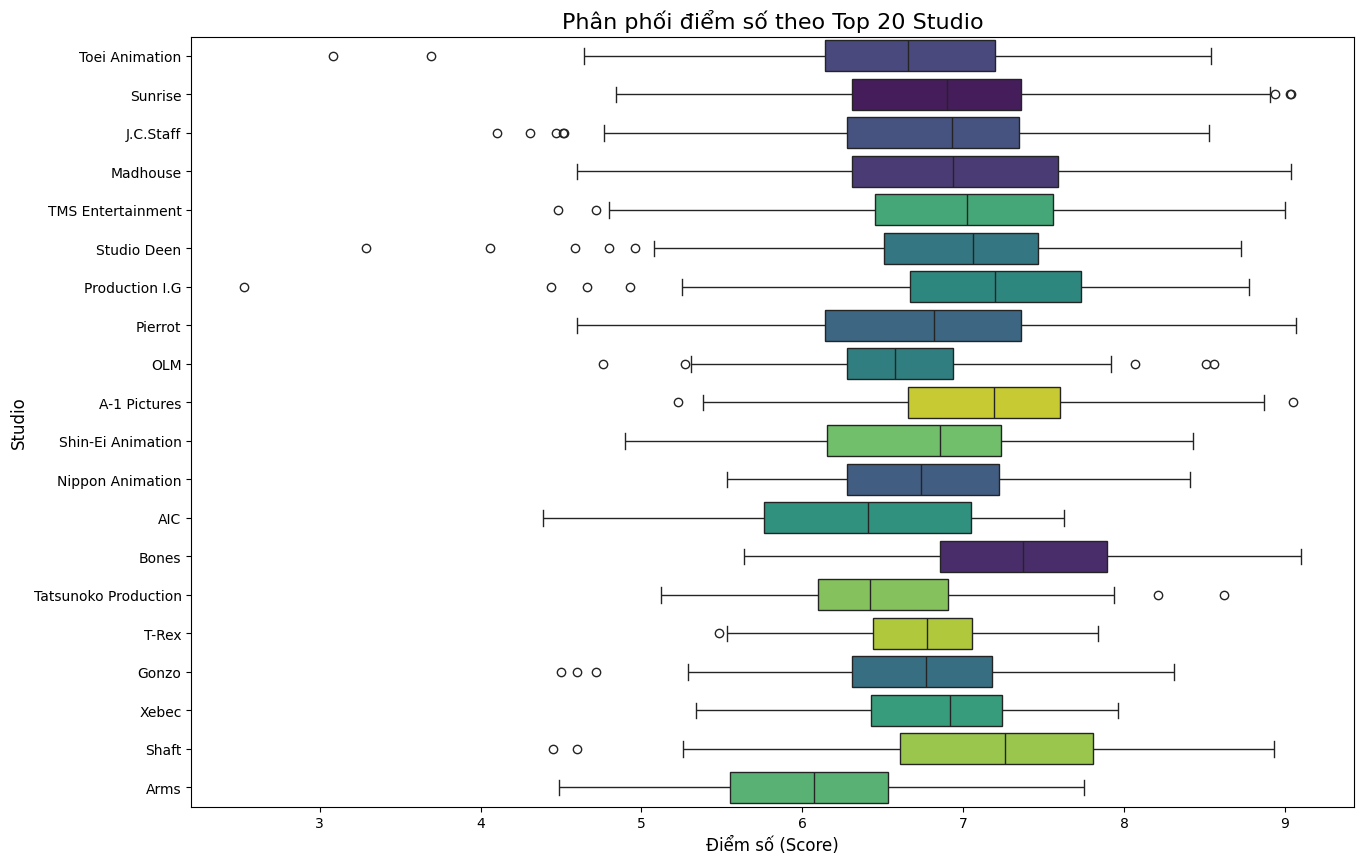

In [4]:
# --- PHÂN TÍCH 2: SCORE vs. STUDIOS ---
print("\n--- PHÂN TÍCH 2: SCORE vs. STUDIOS ---")

# Lấy ra Top 20 studio có nhiều anime nhất
# Chú ý: Dùng dataframe gốc `anime_data_set` trước khi explode để đếm studio cho chính xác
top_studios = anime_data_set['Studios'].value_counts().nlargest(20).index

# Lọc dataframe chỉ chứa các studio này
df_top_studios = anime_data_set[anime_data_set['Studios'].isin(top_studios)].copy()
# Chuyển đổi Score sang dạng số nếu chưa làm trên df gốc
df_top_studios['Score'] = pd.to_numeric(df_top_studios['Score'])


# Chuẩn bị dữ liệu cho ANOVA
studio_scores = [df_top_studios['Score'][df_top_studios['Studios'] == studio] for studio in top_studios]

# Thực hiện kiểm định ANOVA
f_statistic_studio, p_value_studio = stats.f_oneway(*studio_scores)

print(f"F-statistic: {f_statistic_studio:.4f}")
print(f"P-value: {p_value_studio}")

# Diễn giải kết quả
if p_value_studio < alpha:
    print("\nKết luận: P-value rất nhỏ (< 0.05). Chúng ta bác bỏ giả thuyết không.")
    print("=> Có bằng chứng thống kê mạnh mẽ cho thấy ĐIỂM SỐ anime CÓ PHỤ THUỘC vào STUDIO sản xuất.")
else:
    print("\nKết luận: P-value lớn (>= 0.05). Chúng ta không thể bác bỏ giả thuyết không.")
    print("=> Không có đủ bằng chứng thống kê để kết luận rằng điểm số phụ thuộc vào studio.")

# Trực quan hóa
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_top_studios, x='Score', y='Studios', order=top_studios,
            hue='Studios', palette='viridis', legend=False)
plt.title('Phân phối điểm số theo Top 20 Studio', fontsize=16)
plt.xlabel('Điểm số (Score)', fontsize=12)
plt.ylabel('Studio', fontsize=12)
plt.show()


--- PHÂN TÍCH 3: SCORE vs. EPISODES & TOTAL DURATION ---
Ma trận tương quan:
                       Score  Episodes  total_duration_sec
Score               1.000000  0.077962            0.151318
Episodes            0.077962  1.000000            0.844937
total_duration_sec  0.151318  0.844937            1.000000

Mối tương quan với Score:
Episodes              0.077962
total_duration_sec    0.151318
Name: Score, dtype: float64


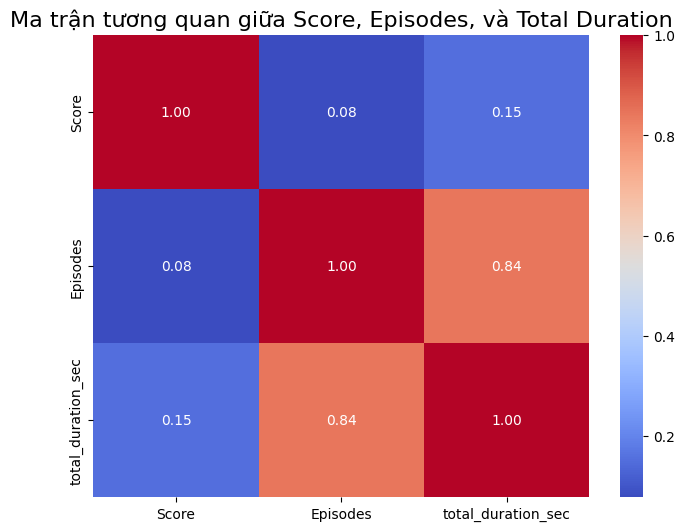

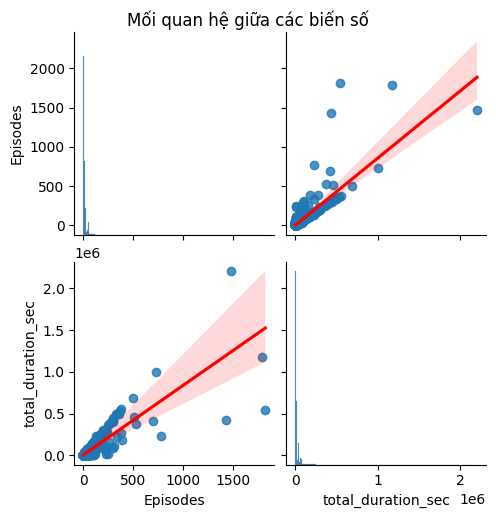


Điểm số trung bình theo từng nhóm số tập:
episode_category
Very Long (101-200)    7.181778
Standard (14-26)       6.998539
Long (53-100)          6.894451
Epic (>200)            6.878718
Medium (27-52)         6.841822
Short (2-13)           6.610717
Movie (1)              6.531335
Name: Score, dtype: float64


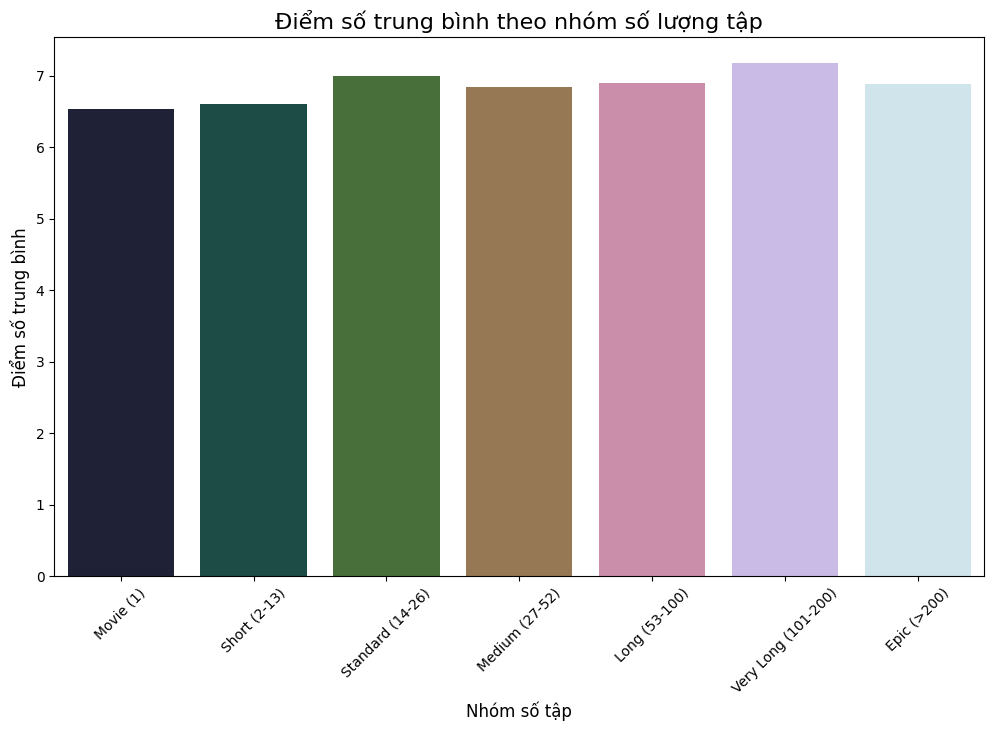

In [5]:
# --- PHÂN TÍCH 3: SCORE vs. BIẾN SỐ ---
print("\n--- PHÂN TÍCH 3: SCORE vs. EPISODES & TOTAL DURATION ---")

# Chọn các cột số cần phân tích
numerical_cols = ['Score', 'Episodes', 'total_duration_sec']
# Dùng dataframe gốc anime_data_set vì mỗi anime chỉ có 1 dòng
correlation_matrix = anime_data_set[numerical_cols].corr()

print("Ma trận tương quan:")
print(correlation_matrix)

# Trích xuất mối tương quan với Score
score_correlation = correlation_matrix['Score'].drop('Score')
print("\nMối tương quan với Score:")
print(score_correlation)

# Trực quan hóa bằng heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Ma trận tương quan giữa Score, Episodes, và Total Duration', fontsize=16)
plt.show()

# Trực quan hóa bằng scatter plot để xem rõ hơn
sns.pairplot(anime_data_set[numerical_cols], kind='reg', plot_kws={'line_kws':{'color':'red'}})
plt.suptitle('Mối quan hệ giữa các biến số', y=1.02)
plt.show()

# --- PHÂN TÍCH SÂU HƠN: ĐIỂM SỐ THEO NHÓM SỐ TẬP ---

# Tạo ra các nhóm số tập (bins)
# Sử dụng dataframe gốc anime_data_set
bins = [0, 1, 13, 26, 52, 100, 200, 10000]
labels = ['Movie (1)', 'Short (2-13)', 'Standard (14-26)', 'Medium (27-52)', 
          'Long (53-100)', 'Very Long (101-200)', 'Epic (>200)']

# Tạo một cột mới chứa nhãn của nhóm
anime_data_set['episode_category'] = pd.cut(anime_data_set['Episodes'], bins=bins, labels=labels, right=True)
# Chuyển đổi Score sang số nếu chưa làm
anime_data_set['Score'] = pd.to_numeric(anime_data_set['Score'])


# Tính điểm số trung bình cho mỗi nhóm
score_by_episode_category = anime_data_set.groupby('episode_category', observed=True)['Score'].mean().sort_values(ascending=False)

print("\nĐiểm số trung bình theo từng nhóm số tập:")
print(score_by_episode_category)

# Trực quan hóa
plt.figure(figsize=(12, 7))
sns.barplot(x=score_by_episode_category.index, y=score_by_episode_category.values,
            hue=score_by_episode_category.index, palette='cubehelix', legend=False)
plt.title('Điểm số trung bình theo nhóm số lượng tập', fontsize=16)
plt.ylabel('Điểm số trung bình', fontsize=12)
plt.xlabel('Nhóm số tập', fontsize=12)
plt.xticks(rotation=45)
plt.show()


--- PHÂN TÍCH 4: SCORE vs. TYPE ---
Các loại hình phát hành trong dữ liệu: ['TV' 'Movie' 'OVA' 'Special' 'ONA' 'Music']

F-statistic: 265.1779
P-value: 5.798224517224973e-269

Kết luận: P-value rất nhỏ (< 0.05). Chúng ta bác bỏ giả thuyết không.
=> Có bằng chứng thống kê mạnh mẽ cho thấy ĐIỂM SỐ anime CÓ PHỤ THUỘC vào LOẠI HÌNH PHÁT HÀNH (Type).


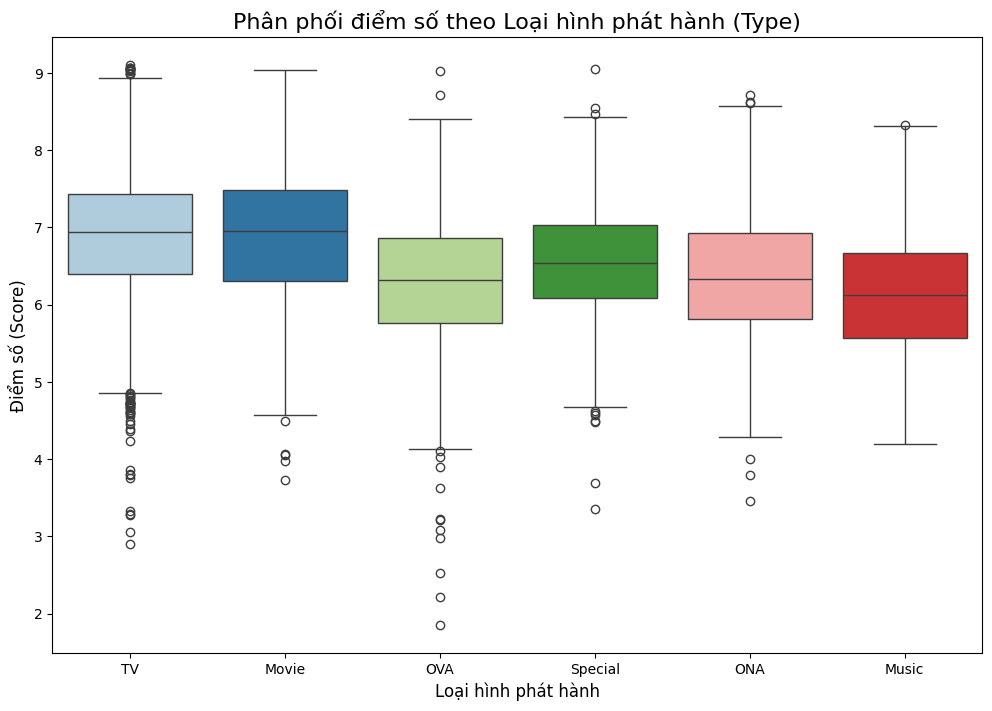

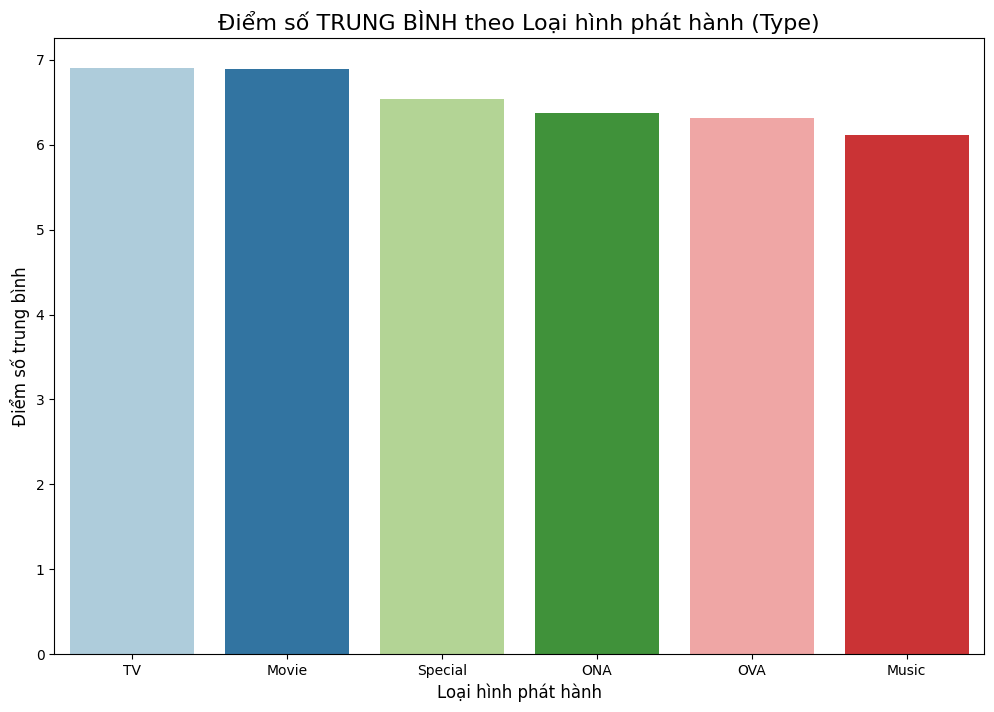

In [6]:
# --- PHÂN TÍCH BỔ SUNG: SCORE vs. TYPE ---
print("\n--- PHÂN TÍCH 4: SCORE vs. TYPE ---")

# Chúng ta sẽ sử dụng dataframe gốc `anime_data_set`
# Đảm bảo cột Score là dạng số
anime_data_set['Score'] = pd.to_numeric(anime_data_set['Score'])

# Lấy ra tất cả các loại hình độc nhất
types = anime_data_set['Type'].unique()
print(f"Các loại hình phát hành trong dữ liệu: {types}")

# Chuẩn bị dữ liệu cho ANOVA: một danh sách các mảng điểm số, mỗi mảng cho một loại hình
type_scores = [anime_data_set['Score'][anime_data_set['Type'] == t] for t in types]

# Thực hiện kiểm định ANOVA
f_statistic_type, p_value_type = stats.f_oneway(*type_scores)

print(f"\nF-statistic: {f_statistic_type:.4f}")
print(f"P-value: {p_value_type}")

# Diễn giải kết quả
alpha = 0.05
if p_value_type < alpha:
    print("\nKết luận: P-value rất nhỏ (< 0.05). Chúng ta bác bỏ giả thuyết không.")
    print("=> Có bằng chứng thống kê mạnh mẽ cho thấy ĐIỂM SỐ anime CÓ PHỤ THUỘC vào LOẠI HÌNH PHÁT HÀNH (Type).")
else:
    print("\nKết luận: P-value lớn (>= 0.05). Chúng ta không thể bác bỏ giả thuyết không.")
    print("=> Không có đủ bằng chứng thống kê để kết luận rằng điểm số phụ thuộc vào loại hình phát hành.")

# Trực quan hóa bằng boxplot để so sánh phân phối điểm số
plt.figure(figsize=(12, 8))
# Sử dụng cú pháp đã sửa lỗi để tránh cảnh báo trong tương lai
sns.boxplot(data=anime_data_set, x='Type', y='Score',
            hue='Type', palette='Paired', legend=False)
plt.title('Phân phối điểm số theo Loại hình phát hành (Type)', fontsize=16)
plt.xlabel('Loại hình phát hành', fontsize=12)
plt.ylabel('Điểm số (Score)', fontsize=12)
plt.show()

# Trực quan hóa bằng barplot để so sánh điểm số trung bình
plt.figure(figsize=(12, 8))
# Tính điểm trung bình và sắp xếp
avg_score_by_type = anime_data_set.groupby('Type')['Score'].mean().sort_values(ascending=False)
sns.barplot(x=avg_score_by_type.index, y=avg_score_by_type.values,
            hue=avg_score_by_type.index, palette='Paired', legend=False)
plt.title('Điểm số TRUNG BÌNH theo Loại hình phát hành (Type)', fontsize=16)
plt.xlabel('Loại hình phát hành', fontsize=12)
plt.ylabel('Điểm số trung bình', fontsize=12)
plt.show()


--- PHÂN TÍCH NÂNG CẤP: SO SÁNH MỨC ĐỘ ẢNH HƯỞNG CỦA 4 YẾU TỐ ---

Kết quả Eta-squared (mức độ ảnh hưởng) của 4 yếu tố:
- Type: 0.1048 (10.48%)
- Source: 0.1005 (10.05%)
- Studios: 0.0914 (9.14%)
- Genres: 0.0590 (5.90%)


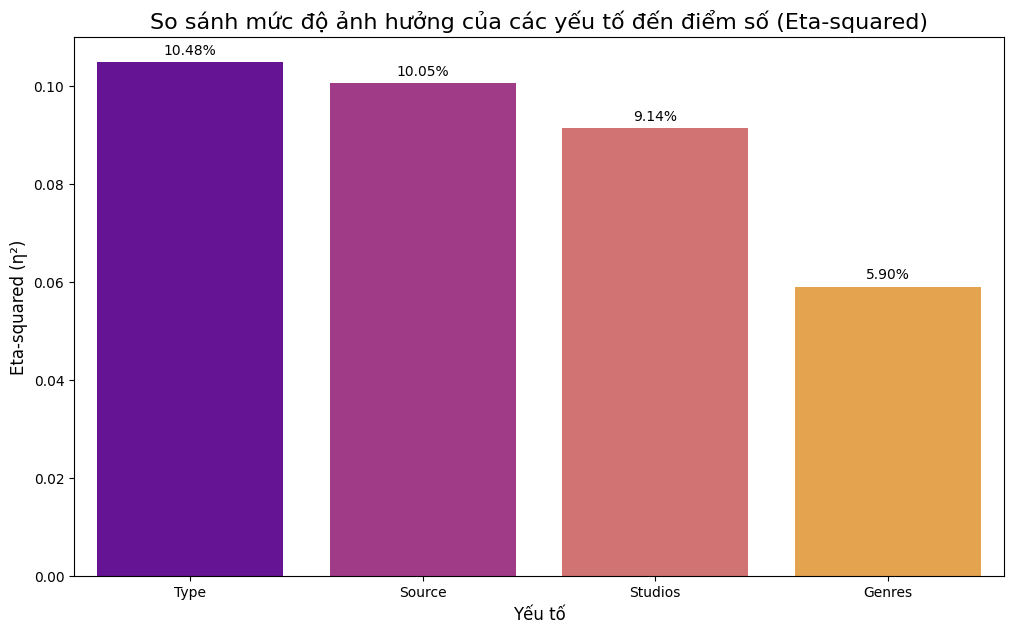

In [7]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

print("\n--- PHÂN TÍCH NÂNG CẤP: SO SÁNH MỨC ĐỘ ẢNH HƯỞNG CỦA 4 YẾU TỐ ---")

# Chuẩn bị một dictionary để lưu kết quả
effect_sizes = {}

# --- 1. Tính Eta-squared cho Genres ---
model_genre = ols('Score ~ C(Genre)', data=df_top_genres).fit()
anova_table_genre = sm.stats.anova_lm(model_genre, typ=2)
# Dùng .iloc để truy cập theo vị trí, tránh warning
eta_sq_genre = anova_table_genre['sum_sq'].iloc[0] / (anova_table_genre['sum_sq'].iloc[0] + anova_table_genre['sum_sq'].iloc[1])
effect_sizes['Genres'] = eta_sq_genre

# --- 2. Tính Eta-squared cho Studios ---
model_studio = ols('Score ~ C(Studios)', data=df_top_studios).fit()
anova_table_studio = sm.stats.anova_lm(model_studio, typ=2)
# Dùng .iloc để truy cập theo vị trí, tránh warning
eta_sq_studio = anova_table_studio['sum_sq'].iloc[0] / (anova_table_studio['sum_sq'].iloc[0] + anova_table_studio['sum_sq'].iloc[1])
effect_sizes['Studios'] = eta_sq_studio

# --- 3. Tính Eta-squared cho Type ---
model_type = ols('Score ~ C(Type)', data=anime_data_set).fit()
anova_table_type = sm.stats.anova_lm(model_type, typ=2)
# Dùng .iloc để truy cập theo vị trí, tránh warning
eta_sq_type = anova_table_type['sum_sq'].iloc[0] / (anova_table_type['sum_sq'].iloc[0] + anova_table_type['sum_sq'].iloc[1])
effect_sizes['Type'] = eta_sq_type

# --- 4. (MỚI) Tính Eta-squared cho Source ---
# Lọc ra top 10 nguồn gốc phổ biến nhất để phân tích có ý nghĩa
top_sources = anime_data_set['Source'].value_counts().nlargest(10).index
df_top_sources = anime_data_set[anime_data_set['Source'].isin(top_sources)].copy()
# Chuyển Score sang dạng số
df_top_sources['Score'] = pd.to_numeric(df_top_sources['Score'])
# Xây dựng model
model_source = ols('Score ~ C(Source)', data=df_top_sources).fit()
anova_table_source = sm.stats.anova_lm(model_source, typ=2)
# Dùng .iloc để truy cập theo vị trí, tránh warning
eta_sq_source = anova_table_source['sum_sq'].iloc[0] / (anova_table_source['sum_sq'].iloc[0] + anova_table_source['sum_sq'].iloc[1])
effect_sizes['Source'] = eta_sq_source

# --- 5. So sánh tổng hợp 4 yếu tố ---
print("\nKết quả Eta-squared (mức độ ảnh hưởng) của 4 yếu tố:")
# Sắp xếp dictionary theo giá trị giảm dần để hiển thị kết quả một cách logic
sorted_effect_sizes = {k: v for k, v in sorted(effect_sizes.items(), key=lambda item: item[1], reverse=True)}

for factor, value in sorted_effect_sizes.items():
    print(f"- {factor}: {value:.4f} ({value:.2%})")

# Chuyển đổi sang Series để vẽ biểu đồ
effect_sizes_series = pd.Series(sorted_effect_sizes)

# Trực quan hóa kết quả so sánh
plt.figure(figsize=(12, 7))
sns.barplot(x=effect_sizes_series.index, y=effect_sizes_series.values,
            hue=effect_sizes_series.index, palette='plasma', legend=False)
plt.title('So sánh mức độ ảnh hưởng của các yếu tố đến điểm số (Eta-squared)', fontsize=16)
plt.ylabel('Eta-squared (η²)', fontsize=12)
plt.xlabel('Yếu tố', fontsize=12)
# Thêm nhãn % lên trên các cột
for index, value in enumerate(effect_sizes_series.values):
    plt.text(index, value + 0.001, f'{value:.2%}', ha='center', va='bottom')
plt.show()

# Mô hình dự đoán Anime

**Ngày tạo:** 6/8/2025
**Tác giả:** [hkk4567]

d:\testAnimeDataset\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Đã import thành công các thư viện cần thiết.

--- PHASE 1: TẢI VÀ LÀM SẠCH DỮ LIỆU ---
Kích thước dữ liệu gốc: (24905, 24)
Kích thước dữ liệu sau khi làm sạch: (10398, 26)

--- PHASE 2: PHÂN TÍCH KHÁM PHÁ VÀ KIỂM TRA GIẢ THUYẾT ---

Phân tích mức độ ảnh hưởng của Genres, Studios, Type, Source...

Kết quả Eta-squared (mức độ ảnh hưởng) của 4 yếu tố:
- Type: 0.1080 (10.80%)
- Source: 0.0771 (7.71%)
- Studios: 0.0752 (7.52%)
- Genres: 0.0593 (5.93%)


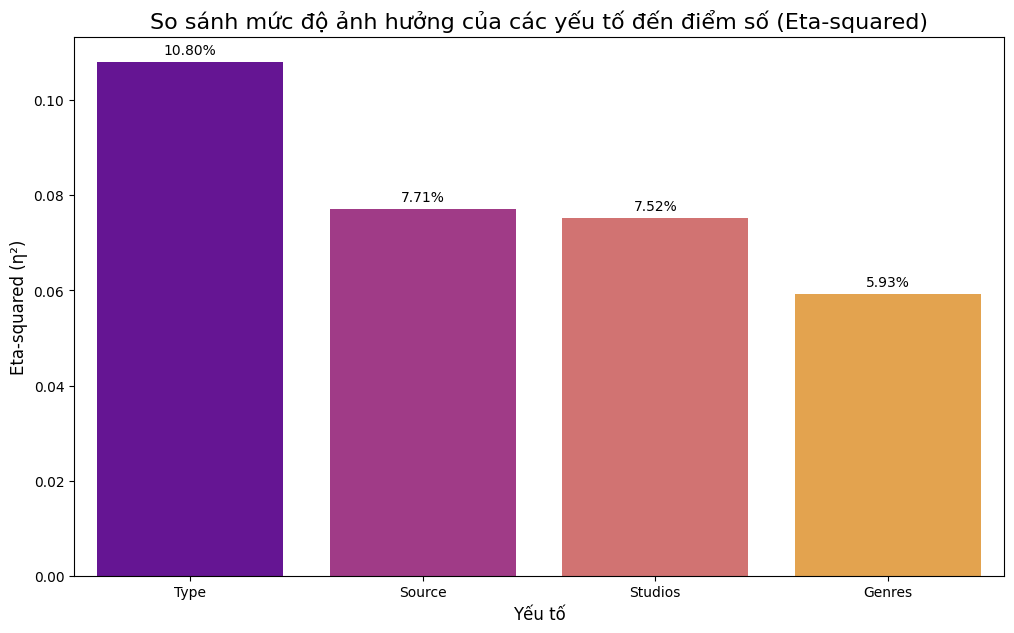

--- DANH SÁCH TOP 30 STUDIO PHỔ BIẾN NHẤT TRONG BỘ DỮ LIỆU ---
 1. Toei Animation            (Số lượng: 517)
 2. Sunrise                   (Số lượng: 393)
 3. J.C.Staff                 (Số lượng: 325)
 4. Madhouse                  (Số lượng: 297)
 5. Studio Deen               (Số lượng: 248)
 6. Pierrot                   (Số lượng: 231)
 7. Production I.G            (Số lượng: 213)
 8. TMS Entertainment         (Số lượng: 210)
 9. A-1 Pictures              (Số lượng: 193)
10. OLM                       (Số lượng: 192)
11. Bones                     (Số lượng: 132)
12. AIC                       (Số lượng: 129)
13. T-Rex                     (Số lượng: 123)
14. Nippon Animation          (Số lượng: 119)
15. Gonzo                     (Số lượng: 115)
16. Xebec                     (Số lượng: 108)
17. Shaft                     (Số lượng: 107)
18. Shin-Ei Animation         (Số lượng: 105)
19. Kyoto Animation           (Số lượng: 94)
20. SILVER LINK.              (Số lượng: 92)
21. Tatsunoko Produ

In [7]:
# ==============================================================================
# PHASE 0: IMPORT CÁC THƯ VIỆN CẦN THIẾT
# ==============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MultiLabelBinarizer
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
import joblib
import optuna

print("Đã import thành công các thư viện cần thiết.")

# ==============================================================================
# PHASE 1: TẢI VÀ LÀM SẠCH DỮ LIỆU
# ==============================================================================
print("\n--- PHASE 1: TẢI VÀ LÀM SẠCH DỮ LIỆU ---")

# Tải dữ liệu
try:
    anime_data_set = pd.read_csv("dataset/anime-dataset-2023.csv")
    print(f"Kích thước dữ liệu gốc: {anime_data_set.shape}")
except FileNotFoundError:
    print("LỖI: Không tìm thấy file 'dataset/anime-dataset-2023.csv'. Hãy đảm bảo file nằm trong đúng thư mục.")
    exit()

# Lọc các giá trị "UNKNOWN"
anime_data_set = anime_data_set[anime_data_set["Score"] != "UNKNOWN"]
anime_data_set = anime_data_set[anime_data_set["Studios"] != "UNKNOWN"]
anime_data_set = anime_data_set[anime_data_set["Genres"] != "UNKNOWN"]
anime_data_set = anime_data_set[anime_data_set["Episodes"] != "UNKNOWN"]
anime_data_set = anime_data_set[anime_data_set["Source"] != "Unknown"]

# Chuyển đổi các cột quan trọng sang dạng số ngay từ đầu
anime_data_set['Score'] = pd.to_numeric(anime_data_set['Score'])
anime_data_set['Episodes'] = pd.to_numeric(anime_data_set['Episodes'])

# Xử lý cột 'Duration' để tính thời lượng mỗi tập (giây)
anime_data_set[["hrs", "mins"]] = anime_data_set["Duration"].str.extract(r"(?:(\d+)\s*hr)?[^0-9]*(?:(\d+)\s*min)?", expand=True)
anime_data_set["hrs"] = anime_data_set["hrs"].fillna(0).astype(float)
anime_data_set["mins"] = anime_data_set["mins"].fillna(0).astype(float)
anime_data_set["duration_per_episode_sec"] = (anime_data_set["hrs"] * 3600) + (anime_data_set["mins"] * 60)

# Tính tổng thời lượng của cả series
anime_data_set['total_duration_sec'] = anime_data_set['duration_per_episode_sec'] * anime_data_set['Episodes']

# Lọc bỏ các dòng có thời lượng bằng 0 và dọn dẹp
anime_data_set = anime_data_set[anime_data_set["duration_per_episode_sec"] != 0.0]
anime_data_set = anime_data_set.drop(columns=['hrs', 'mins'])

print(f"Kích thước dữ liệu sau khi làm sạch: {anime_data_set.shape}")


# ==============================================================================
# PHASE 2: PHÂN TÍCH KHÁM PHÁ VÀ KIỂM TRA GIẢ THUYẾT
# ==============================================================================
print("\n--- PHASE 2: PHÂN TÍCH KHÁM PHÁ VÀ KIỂM TRA GIẢ THUYẾT ---")

# --- 2.1 So sánh mức độ ảnh hưởng của các yếu tố đến Score (ANOVA & Eta-squared) ---
print("\nPhân tích mức độ ảnh hưởng của Genres, Studios, Type, Source...")

# A. Chuẩn bị các dataframe con để phân tích
# Dùng cho Genres
anime_exploded_df = anime_data_set.assign(Genre=anime_data_set['Genres'].str.split(', ')).explode('Genre')
top_genres = anime_exploded_df['Genre'].value_counts().nlargest(20).index
df_top_genres = anime_exploded_df[anime_exploded_df['Genre'].isin(top_genres)]

# Dùng cho Studios
top_studios = anime_data_set['Studios'].value_counts().nlargest(20).index
df_top_studios = anime_data_set[anime_data_set['Studios'].isin(top_studios)].copy()

# Dùng cho Source
top_sources = anime_data_set['Source'].value_counts().nlargest(10).index
df_top_sources = anime_data_set[anime_data_set['Source'].isin(top_sources)].copy()

# B. Tính Eta-squared cho từng yếu tố
effect_sizes = {}
models_to_run = {
    'Genres': ols('Score ~ C(Genre)', data=df_top_genres),
    'Studios': ols('Score ~ C(Studios)', data=df_top_studios),
    'Type': ols('Score ~ C(Type)', data=anime_data_set),
    'Source': ols('Score ~ C(Source)', data=df_top_sources)
}

for name, model in models_to_run.items():
    fitted_model = model.fit()
    anova_table = sm.stats.anova_lm(fitted_model, typ=2)
    eta_sq = anova_table['sum_sq'].iloc[0] / (anova_table['sum_sq'].iloc[0] + anova_table['sum_sq'].iloc[1])
    effect_sizes[name] = eta_sq

# C. Sắp xếp và trực quan hóa kết quả so sánh
sorted_effect_sizes = {k: v for k, v in sorted(effect_sizes.items(), key=lambda item: item[1], reverse=True)}
print("\nKết quả Eta-squared (mức độ ảnh hưởng) của 4 yếu tố:")
for factor, value in sorted_effect_sizes.items():
    print(f"- {factor}: {value:.4f} ({value:.2%})")

effect_sizes_series = pd.Series(sorted_effect_sizes)
plt.figure(figsize=(12, 7))
sns.barplot(x=effect_sizes_series.index, y=effect_sizes_series.values, hue=effect_sizes_series.index, palette='plasma', legend=False)
plt.title('So sánh mức độ ảnh hưởng của các yếu tố đến điểm số (Eta-squared)', fontsize=16)
plt.ylabel('Eta-squared (η²)', fontsize=12)
plt.xlabel('Yếu tố', fontsize=12)
for index, value in enumerate(effect_sizes_series.values):
    plt.text(index, value + 0.001, f'{value:.2%}', ha='center', va='bottom')
plt.show()

top_30_studios = anime_data_set['Studios'].value_counts().nlargest(30)
print("--- DANH SÁCH TOP 30 STUDIO PHỔ BIẾN NHẤT TRONG BỘ DỮ LIỆU ---")
# In ra danh sách kèm theo số lượng anime
for i, (studio, count) in enumerate(top_30_studios.items()):
    print(f"{i+1:2d}. {studio:<25} (Số lượng: {count})")

[I 2025-08-06 21:36:31,213] A new study created in memory with name: no-name-5e6cbb29-2ca7-43f3-a67f-f4d09b5ba5ea



--- PHASE 3 (V5 - FINAL UPGRADE): FEATURE ENGINEERING & OPTUNA OPTIMIZATION ---

Nâng cấp Feature Engineering: Tạo ra các 'feature uy tín'...
Kích thước cuối cùng của bộ dữ liệu huấn luyện (X): (10398, 70)

Sử dụng Optuna để tìm kiếm siêu tham số tốt nhất một cách thông minh...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000472 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 8318, number of used features: 69
[LightGBM] [Info] Start training from score 6.700000


[I 2025-08-06 21:36:31,363] Trial 0 finished with value: 0.5594571282317853 and parameters: {'n_estimators': 135, 'learning_rate': 0.04052025725808427, 'num_leaves': 37, 'max_depth': 15, 'subsample': 0.893179909868164, 'colsample_bytree': 0.8070064623353046}. Best is trial 0 with value: 0.5594571282317853.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000515 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 8318, number of used features: 69
[LightGBM] [Info] Start training from score 6.700000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-08-06 21:36:32,358] Trial 1 finished with value: 0.5841728569038707 and parameters: {'n_estimators': 845, 'learning_rate': 0.01913375822884789, 'num_leaves': 68, 'max_depth': 11, 'subsample': 0.909958704037493, 'colsample_bytree': 0.7682273700928195}. Best is trial 1 with value: 0.5841728569038707.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000529 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 8318, number of used features: 69
[LightGBM] [Info] Start training from score 6.700000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-08-06 21:36:33,045] Trial 2 finished with value: 0.5871840046670525 and parameters: {'n_estimators': 511, 'learning_rate': 0.07886647237252103, 'num_leaves': 103, 'max_depth': 13, 'subsample': 0.9720563362711119, 'colsample_bytree': 0.8024274345812061}. Best is trial 2 with value: 0.5871840046670525.
[I 2025-08-06 21:36:33,139] Trial 3 finished with value: 0.536956475567814 and parameters: {'n_estimators': 173, 'learning_rate': 0.04658502035212628, 'num_leaves': 32, 'max_depth': 5, 'subsample': 0.75561455633597, 'colsample_bytree': 0.8768518807933777}. Best is trial 2 with value: 0.5871840046670525.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000470 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 8318, number of used features: 69
[LightGBM] [Info] Start training from score 6.700000
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-08-06 21:36:33,729] Trial 4 finished with value: 0.5781659074472115 and parameters: {'n_estimators': 891, 'learning_rate': 0.17422806030917884, 'num_leaves': 126, 'max_depth': 8, 'subsample': 0.707131833385475, 'colsample_bytree': 0.9169900452216802}. Best is trial 2 with value: 0.5871840046670525.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 21:36:34,211] Trial 5 finished with value: 0.5851957476680716 and parameters: {'n_estimators': 544, 'learning_rate': 0.1008861422187758, 'num_leaves': 84, 'max_depth': 10, 'subsample': 0.8444441423818724, 'colsample_bytree': 0.8722536223093003}. Best is trial 2 with value: 0.5871840046670525.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000706 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 8318, number of used features: 69
[LightGBM] [Info] Start training from score 6.700000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-08-06 21:36:34,682] Trial 6 finished with value: 0.5807922004764755 and parameters: {'n_estimators': 810, 'learning_rate': 0.10068753716976216, 'num_leaves': 90, 'max_depth': 7, 'subsample': 0.839366073888493, 'colsample_bytree': 0.7093241316863517}. Best is trial 2 with value: 0.5871840046670525.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Au

[I 2025-08-06 21:36:34,843] Trial 7 finished with value: 0.48501894120329714 and parameters: {'n_estimators': 171, 'learning_rate': 0.011343193810161568, 'num_leaves': 80, 'max_depth': 6, 'subsample': 0.8928674383896683, 'colsample_bytree': 0.9406097806404676}. Best is trial 2 with value: 0.5871840046670525.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001503 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 8318, number of used features: 69
[LightGBM] [Info] Start training from score 6.700000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-08-06 21:36:35,056] Trial 8 finished with value: 0.5796034789328876 and parameters: {'n_estimators': 409, 'learning_rate': 0.11640974196839317, 'num_leaves': 23, 'max_depth': 12, 'subsample': 0.749439836700849, 'colsample_bytree': 0.9858769359676622}. Best is trial 2 with value: 0.5871840046670525.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000598 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 8318, number of used features: 69
[LightGBM] [Info] Start training from score 6.700000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-08-06 21:36:35,418] Trial 9 finished with value: 0.5780264933106654 and parameters: {'n_estimators': 491, 'learning_rate': 0.10672595320912287, 'num_leaves': 71, 'max_depth': 8, 'subsample': 0.809253833525013, 'colsample_bytree': 0.7712879123266091}. Best is trial 2 with value: 0.5871840046670525.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 21:36:36,576] Trial 10 finished with value: 0.5851699373384887 and parameters: {'n_estimators': 692, 'learning_rate': 0.19666330091570455, 'num_leaves': 149, 'max_depth': 15, 'subsample': 0.9930375378575634, 'colsample_bytree': 0.8191304169436333}. Best is trial 2 with value: 0.5871840046670525.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000409 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 8318, number of used features: 69
[LightGBM] [Info] Start training from score 6.700000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-08-06 21:36:37,391] Trial 11 finished with value: 0.5924457629169357 and parameters: {'n_estimators': 620, 'learning_rate': 0.08270041129406523, 'num_leaves': 105, 'max_depth': 13, 'subsample': 0.9936504493254764, 'colsample_bytree': 0.8636429759666621}. Best is trial 11 with value: 0.5924457629169357.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 21:36:38,260] Trial 12 finished with value: 0.5892924292590245 and parameters: {'n_estimators': 686, 'learning_rate': 0.07247693015707163, 'num_leaves': 111, 'max_depth': 13, 'subsample': 0.9854176443813782, 'colsample_bytree': 0.840008442125275}. Best is trial 11 with value: 0.5924457629169357.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000450 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 8318, number of used features: 69
[LightGBM] [Info] Start training from score 6.700000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-08-06 21:36:39,115] Trial 13 finished with value: 0.5879646304701356 and parameters: {'n_estimators': 703, 'learning_rate': 0.0661370849776815, 'num_leaves': 115, 'max_depth': 13, 'subsample': 0.9545727660983788, 'colsample_bytree': 0.9010129793362507}. Best is trial 11 with value: 0.5924457629169357.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000372 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 8318, number of used features: 69
[LightGBM] [Info] Start training from score 6.700000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-08-06 21:36:40,058] Trial 14 finished with value: 0.591452884858241 and parameters: {'n_estimators': 707, 'learning_rate': 0.14142186956046532, 'num_leaves': 136, 'max_depth': 14, 'subsample': 0.9438270327519311, 'colsample_bytree': 0.8485573688290935}. Best is trial 11 with value: 0.5924457629169357.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 21:36:40,955] Trial 15 finished with value: 0.581476827293206 and parameters: {'n_estimators': 623, 'learning_rate': 0.1438225308201772, 'num_leaves': 143, 'max_depth': 14, 'subsample': 0.9315074335908784, 'colsample_bytree': 0.8526484812042173}. Best is trial 11 with value: 0.5924457629169357.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 21:36:41,761] Trial 16 finished with value: 0.5767596368609529 and parameters: {'n_estimators': 967, 'learning_rate': 0.15533088351420585, 'num_leaves': 131, 'max_depth': 10, 'subsample': 0.941318291995401, 'colsample_bytree': 0.9820068605003067}. Best is trial 11 with value: 0.5924457629169357.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 21:36:42,135] Trial 17 finished with value: 0.5838722422946006 and parameters: {'n_estimators': 319, 'learning_rate': 0.13233926008013566, 'num_leaves': 134, 'max_depth': 11, 'subsample': 0.9959661862417165, 'colsample_bytree': 0.9418008671704214}. Best is trial 11 with value: 0.5924457629169357.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 21:36:43,148] Trial 18 finished with value: 0.585863067171389 and parameters: {'n_estimators': 775, 'learning_rate': 0.18174615409079825, 'num_leaves': 100, 'max_depth': 14, 'subsample': 0.9183825510849459, 'colsample_bytree': 0.7583008788378723}. Best is trial 11 with value: 0.5924457629169357.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000728 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 8318, number of used features: 69
[LightGBM] [Info] Start training from score 6.700000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-08-06 21:36:43,624] Trial 19 finished with value: 0.5841350012175524 and parameters: {'n_estimators': 425, 'learning_rate': 0.13262432087792583, 'num_leaves': 116, 'max_depth': 12, 'subsample': 0.8750138299533788, 'colsample_bytree': 0.8887122037679613}. Best is trial 11 with value: 0.5924457629169357.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001144 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 8318, number of used features: 69
[LightGBM] [Info] Start training from score 6.700000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-08-06 21:36:44,303] Trial 20 finished with value: 0.5882842652682496 and parameters: {'n_estimators': 613, 'learning_rate': 0.16244665889904447, 'num_leaves': 53, 'max_depth': 15, 'subsample': 0.959023279431441, 'colsample_bytree': 0.8447578384061565}. Best is trial 11 with value: 0.5924457629169357.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000623 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 8318, number of used features: 69
[LightGBM] [Info] Start training from score 6.700000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-08-06 21:36:45,757] Trial 21 finished with value: 0.5915715919653299 and parameters: {'n_estimators': 711, 'learning_rate': 0.08533961051212187, 'num_leaves': 114, 'max_depth': 13, 'subsample': 0.9987012990456863, 'colsample_bytree': 0.8412304365048976}. Best is trial 11 with value: 0.5924457629169357.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 21:36:46,816] Trial 22 finished with value: 0.5900242943545098 and parameters: {'n_estimators': 624, 'learning_rate': 0.08505905996766022, 'num_leaves': 121, 'max_depth': 14, 'subsample': 0.9984417680217065, 'colsample_bytree': 0.8299145984562962}. Best is trial 11 with value: 0.5924457629169357.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000509 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 8318, number of used features: 69
[LightGBM] [Info] Start training from score 6.700000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-08-06 21:36:47,669] Trial 23 finished with value: 0.5864477054878832 and parameters: {'n_estimators': 723, 'learning_rate': 0.12048070247950077, 'num_leaves': 102, 'max_depth': 12, 'subsample': 0.9623823338558469, 'colsample_bytree': 0.855364613353438}. Best is trial 11 with value: 0.5924457629169357.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000473 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 8318, number of used features: 69
[LightGBM] [Info] Start training from score 6.700000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-08-06 21:36:48,353] Trial 24 finished with value: 0.5890140249999057 and parameters: {'n_estimators': 592, 'learning_rate': 0.05860321972826281, 'num_leaves': 142, 'max_depth': 11, 'subsample': 0.9382695510106428, 'colsample_bytree': 0.7960405933783067}. Best is trial 11 with value: 0.5924457629169357.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000402 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 8318, number of used features: 69
[LightGBM] [Info] Start training from score 6.700000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-08-06 21:36:49,523] Trial 25 finished with value: 0.5899070986688343 and parameters: {'n_estimators': 922, 'learning_rate': 0.08738416206233905, 'num_leaves': 91, 'max_depth': 14, 'subsample': 0.9712007903100485, 'colsample_bytree': 0.9104855489179673}. Best is trial 11 with value: 0.5924457629169357.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 21:36:50,219] Trial 26 finished with value: 0.5807990219752854 and parameters: {'n_estimators': 771, 'learning_rate': 0.04936561173199043, 'num_leaves': 133, 'max_depth': 9, 'subsample': 0.9759779387325954, 'colsample_bytree': 0.8658687231587532}. Best is trial 11 with value: 0.5924457629169357.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000785 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 8318, number of used features: 69
[LightGBM] [Info] Start training from score 6.700000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-08-06 21:36:50,869] Trial 27 finished with value: 0.5883465813210638 and parameters: {'n_estimators': 464, 'learning_rate': 0.09254228918736604, 'num_leaves': 109, 'max_depth': 13, 'subsample': 0.808018679105746, 'colsample_bytree': 0.733572641007}. Best is trial 11 with value: 0.5924457629169357.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000459 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 8318, number of used features: 69
[LightGBM] [Info] Start training from score 6.700000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-08-06 21:36:51,419] Trial 28 finished with value: 0.5813742544273865 and parameters: {'n_estimators': 361, 'learning_rate': 0.03430371131112873, 'num_leaves': 124, 'max_depth': 12, 'subsample': 0.9441574822754463, 'colsample_bytree': 0.9353943248852148}. Best is trial 11 with value: 0.5924457629169357.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 21:36:52,642] Trial 29 finished with value: 0.5924309830690586 and parameters: {'n_estimators': 856, 'learning_rate': 0.11968041300302193, 'num_leaves': 95, 'max_depth': 15, 'subsample': 0.8734167150395169, 'colsample_bytree': 0.8153872502575447}. Best is trial 11 with value: 0.5924457629169357.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000534 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 8318, number of used features: 69
[LightGBM] [Info] Start training from score 6.700000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-08-06 21:36:53,596] Trial 30 finished with value: 0.5861146680184097 and parameters: {'n_estimators': 877, 'learning_rate': 0.11639291229678264, 'num_leaves': 63, 'max_depth': 15, 'subsample': 0.8734791109459703, 'colsample_bytree': 0.7910810547876119}. Best is trial 11 with value: 0.5924457629169357.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000439 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 8318, number of used features: 69
[LightGBM] [Info] Start training from score 6.700000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-08-06 21:36:54,991] Trial 31 finished with value: 0.5886681691279005 and parameters: {'n_estimators': 986, 'learning_rate': 0.13205691441823614, 'num_leaves': 101, 'max_depth': 15, 'subsample': 0.8907020515306343, 'colsample_bytree': 0.8200748613031862}. Best is trial 11 with value: 0.5924457629169357.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000439 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 8318, number of used features: 69
[LightGBM] [Info] Start training from score 6.700000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-08-06 21:36:56,068] Trial 32 finished with value: 0.5877146271129312 and parameters: {'n_estimators': 822, 'learning_rate': 0.15332628687745783, 'num_leaves': 94, 'max_depth': 14, 'subsample': 0.9049030408400732, 'colsample_bytree': 0.8237406612283312}. Best is trial 11 with value: 0.5924457629169357.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012792 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 8318, number of used features: 69
[LightGBM] [Info] Start training from score 6.700000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-08-06 21:36:56,960] Trial 33 finished with value: 0.5857921971540296 and parameters: {'n_estimators': 748, 'learning_rate': 0.10811313327372543, 'num_leaves': 79, 'max_depth': 13, 'subsample': 0.9202904438918034, 'colsample_bytree': 0.7822311878915583}. Best is trial 11 with value: 0.5924457629169357.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000398 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 8318, number of used features: 69
[LightGBM] [Info] Start training from score 6.700000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-08-06 21:36:57,996] Trial 34 finished with value: 0.5941230703748618 and parameters: {'n_estimators': 682, 'learning_rate': 0.07883718265521444, 'num_leaves': 109, 'max_depth': 15, 'subsample': 0.9786708766894893, 'colsample_bytree': 0.8088316581033957}. Best is trial 34 with value: 0.5941230703748618.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 21:36:58,971] Trial 35 finished with value: 0.5908504797688426 and parameters: {'n_estimators': 652, 'learning_rate': 0.07565085360636356, 'num_leaves': 110, 'max_depth': 15, 'subsample': 0.98122591135961, 'colsample_bytree': 0.8037847140259213}. Best is trial 34 with value: 0.5941230703748618.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010214 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 8318, number of used features: 69
[LightGBM] [Info] Start training from score 6.700000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-08-06 21:36:59,616] Trial 36 finished with value: 0.5833100335338804 and parameters: {'n_estimators': 544, 'learning_rate': 0.059386495855538644, 'num_leaves': 97, 'max_depth': 11, 'subsample': 0.8214547137233128, 'colsample_bytree': 0.8858892864037224}. Best is trial 34 with value: 0.5941230703748618.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000383 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 8318, number of used features: 69
[LightGBM] [Info] Start training from score 6.700000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-08-06 21:37:00,941] Trial 37 finished with value: 0.5918345625696448 and parameters: {'n_estimators': 864, 'learning_rate': 0.041366549496490136, 'num_leaves': 107, 'max_depth': 15, 'subsample': 0.7650133456332393, 'colsample_bytree': 0.7576220696812195}. Best is trial 34 with value: 0.5941230703748618.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000448 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 8318, number of used features: 69
[LightGBM] [Info] Start training from score 6.700000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-08-06 21:37:02,117] Trial 38 finished with value: 0.5916913489875332 and parameters: {'n_estimators': 867, 'learning_rate': 0.02963905684763958, 'num_leaves': 89, 'max_depth': 15, 'subsample': 0.7764582447146634, 'colsample_bytree': 0.7384845745096571}. Best is trial 34 with value: 0.5941230703748618.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000523 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 8318, number of used features: 69
[LightGBM] [Info] Start training from score 6.700000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-08-06 21:37:03,488] Trial 39 finished with value: 0.5895351135286995 and parameters: {'n_estimators': 917, 'learning_rate': 0.023464493782852314, 'num_leaves': 105, 'max_depth': 15, 'subsample': 0.717691345373777, 'colsample_bytree': 0.7449564066769001}. Best is trial 34 with value: 0.5941230703748618.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000540 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 8318, number of used features: 69
[LightGBM] [Info] Start training from score 6.700000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

[I 2025-08-06 21:37:04,510] Trial 40 finished with value: 0.5899168079119972 and parameters: {'n_estimators': 820, 'learning_rate': 0.04852246914010187, 'num_leaves': 73, 'max_depth': 14, 'subsample': 0.7778735458992907, 'colsample_bytree': 0.7063553936609074}. Best is trial 34 with value: 0.5941230703748618.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 21:37:05,727] Trial 41 finished with value: 0.5926711213476359 and parameters: {'n_estimators': 878, 'learning_rate': 0.03077818712397641, 'num_leaves': 82, 'max_depth': 15, 'subsample': 0.7769120131764304, 'colsample_bytree': 0.7288327140728688}. Best is trial 34 with value: 0.5941230703748618.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000478 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 8318, number of used features: 69
[LightGBM] [Info] Start training from score 6.700000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-08-06 21:37:06,909] Trial 42 finished with value: 0.5949093850634131 and parameters: {'n_estimators': 929, 'learning_rate': 0.04277621243872019, 'num_leaves': 83, 'max_depth': 15, 'subsample': 0.7323509336564807, 'colsample_bytree': 0.7215686394940523}. Best is trial 42 with value: 0.5949093850634131.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000473 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 8318, number of used features: 69
[LightGBM] [Info] Start training from score 6.700000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-08-06 21:37:07,868] Trial 43 finished with value: 0.5810244208519418 and parameters: {'n_estimators': 940, 'learning_rate': 0.012054851030181984, 'num_leaves': 55, 'max_depth': 14, 'subsample': 0.7299048647234455, 'colsample_bytree': 0.7220946268490489}. Best is trial 42 with value: 0.5949093850634131.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000427 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 8318, number of used features: 69
[LightGBM] [Info] Start training from score 6.700000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-08-06 21:37:08,930] Trial 44 finished with value: 0.5904190335563417 and parameters: {'n_estimators': 796, 'learning_rate': 0.059489838787257984, 'num_leaves': 83, 'max_depth': 15, 'subsample': 0.7430032466250638, 'colsample_bytree': 0.777118006981489}. Best is trial 42 with value: 0.5949093850634131.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000472 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 8318, number of used features: 69
[LightGBM] [Info] Start training from score 6.700000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-08-06 21:37:09,989] Trial 45 finished with value: 0.5883264527316125 and parameters: {'n_estimators': 965, 'learning_rate': 0.09838938518709273, 'num_leaves': 76, 'max_depth': 13, 'subsample': 0.7955691178658397, 'colsample_bytree': 0.7012389645796234}. Best is trial 42 with value: 0.5949093850634131.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000798 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 8318, number of used features: 69
[LightGBM] [Info] Start training from score 6.700000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

[I 2025-08-06 21:37:10,664] Trial 46 finished with value: 0.5936505510342214 and parameters: {'n_estimators': 573, 'learning_rate': 0.07031366286017347, 'num_leaves': 66, 'max_depth': 14, 'subsample': 0.8573334489331853, 'colsample_bytree': 0.7219216430005653}. Best is trial 42 with value: 0.5949093850634131.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000588 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 8318, number of used features: 69
[LightGBM] [Info] Start training from score 6.700000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-08-06 21:37:11,418] Trial 47 finished with value: 0.5913348563647014 and parameters: {'n_estimators': 658, 'learning_rate': 0.06849901322348403, 'num_leaves': 59, 'max_depth': 14, 'subsample': 0.7016852094133587, 'colsample_bytree': 0.7195757660716622}. Best is trial 42 with value: 0.5949093850634131.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000538 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGB

[I 2025-08-06 21:37:11,686] Trial 48 finished with value: 0.5620058507171788 and parameters: {'n_estimators': 516, 'learning_rate': 0.038929463947668344, 'num_leaves': 43, 'max_depth': 5, 'subsample': 0.8542026404946409, 'colsample_bytree': 0.7509107258586215}. Best is trial 42 with value: 0.5949093850634131.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 21:37:12,467] Trial 49 finished with value: 0.5879396472922134 and parameters: {'n_estimators': 570, 'learning_rate': 0.022314908959188088, 'num_leaves': 86, 'max_depth': 14, 'subsample': 0.7351599835399156, 'colsample_bytree': 0.7283395404203322}. Best is trial 42 with value: 0.5949093850634131.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000394 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 8318, number of used features: 69
[LightGBM] [Info] Start training from score 6.700000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-08-06 21:37:13,059] Trial 50 finished with value: 0.5874186499994245 and parameters: {'n_estimators': 486, 'learning_rate': 0.052479066209589545, 'num_leaves': 66, 'max_depth': 13, 'subsample': 0.7182713454947401, 'colsample_bytree': 0.7629783523486809}. Best is trial 42 with value: 0.5949093850634131.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 21:37:14,318] Trial 51 finished with value: 0.5923776164883979 and parameters: {'n_estimators': 908, 'learning_rate': 0.06678993786381243, 'num_leaves': 94, 'max_depth': 15, 'subsample': 0.8354944480860269, 'colsample_bytree': 0.8113308256341809}. Best is trial 42 with value: 0.5949093850634131.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000904 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 8318, number of used features: 69
[LightGBM] [Info] Start training from score 6.700000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

[I 2025-08-06 21:37:15,586] Trial 52 finished with value: 0.5910401819754945 and parameters: {'n_estimators': 996, 'learning_rate': 0.07905710088129186, 'num_leaves': 71, 'max_depth': 15, 'subsample': 0.8636926039951615, 'colsample_bytree': 0.7170881920441415}. Best is trial 42 with value: 0.5949093850634131.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000581 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 8318, number of used features: 69
[LightGBM] [Info] Start training from score 6.700000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-08-06 21:37:15,986] Trial 53 finished with value: 0.5864479545617344 and parameters: {'n_estimators': 271, 'learning_rate': 0.09656098830876081, 'num_leaves': 80, 'max_depth': 14, 'subsample': 0.8310803346457807, 'colsample_bytree': 0.8668906972333035}. Best is trial 42 with value: 0.5949093850634131.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 21:37:17,159] Trial 54 finished with value: 0.5931849375651412 and parameters: {'n_estimators': 832, 'learning_rate': 0.07910841223451555, 'num_leaves': 86, 'max_depth': 15, 'subsample': 0.7641359466280908, 'colsample_bytree': 0.7668597547303924}. Best is trial 42 with value: 0.5949093850634131.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 21:37:18,167] Trial 55 finished with value: 0.5892353997375039 and parameters: {'n_estimators': 753, 'learning_rate': 0.0793891771496586, 'num_leaves': 87, 'max_depth': 14, 'subsample': 0.7926081451833321, 'colsample_bytree': 0.7363434746791395}. Best is trial 42 with value: 0.5949093850634131.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000470 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 8318, number of used features: 69
[LightGBM] [Info] Start training from score 6.700000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-08-06 21:37:18,515] Trial 56 finished with value: 0.5769740788476598 and parameters: {'n_estimators': 558, 'learning_rate': 0.07305974304467068, 'num_leaves': 41, 'max_depth': 7, 'subsample': 0.7608113667729883, 'colsample_bytree': 0.7851916306509938}. Best is trial 42 with value: 0.5949093850634131.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 21:37:19,244] Trial 57 finished with value: 0.5900793523554111 and parameters: {'n_estimators': 646, 'learning_rate': 0.05490378083326741, 'num_leaves': 67, 'max_depth': 13, 'subsample': 0.7531378547160731, 'colsample_bytree': 0.7676047485604912}. Best is trial 42 with value: 0.5949093850634131.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 21:37:20,028] Trial 58 finished with value: 0.5903642020105083 and parameters: {'n_estimators': 837, 'learning_rate': 0.06362020798815284, 'num_leaves': 48, 'max_depth': 15, 'subsample': 0.7706577985286024, 'colsample_bytree': 0.7483391800451502}. Best is trial 42 with value: 0.5949093850634131.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000628 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 8318, number of used features: 69
[LightGBM] [Info] Start training from score 6.700000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-08-06 21:37:21,309] Trial 59 finished with value: 0.5928543979214163 and parameters: {'n_estimators': 944, 'learning_rate': 0.04186820375496251, 'num_leaves': 118, 'max_depth': 14, 'subsample': 0.7880622377317574, 'colsample_bytree': 0.7103216992725047}. Best is trial 42 with value: 0.5949093850634131.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002194 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 8318, number of used features: 69
[LightGBM] [Info] Start training from score 6.700000


[I 2025-08-06 21:37:21,963] Trial 60 finished with value: 0.5798184108703444 and parameters: {'n_estimators': 946, 'learning_rate': 0.029550781302545417, 'num_leaves': 27, 'max_depth': 14, 'subsample': 0.7838478063458022, 'colsample_bytree': 0.72576101115289}. Best is trial 42 with value: 0.5949093850634131.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000419 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 8318, number of used features: 69
[LightGBM] [Info] Start training from score 6.700000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-08-06 21:37:23,357] Trial 61 finished with value: 0.5952516708788027 and parameters: {'n_estimators': 902, 'learning_rate': 0.04126696158232005, 'num_leaves': 119, 'max_depth': 15, 'subsample': 0.7454330814998089, 'colsample_bytree': 0.7025800045155481}. Best is trial 61 with value: 0.5952516708788027.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 21:37:24,739] Trial 62 finished with value: 0.5911289590360621 and parameters: {'n_estimators': 904, 'learning_rate': 0.04508761536178004, 'num_leaves': 119, 'max_depth': 15, 'subsample': 0.7369305897558842, 'colsample_bytree': 0.7161596276846834}. Best is trial 61 with value: 0.5952516708788027.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 21:37:26,304] Trial 63 finished with value: 0.589739186721562 and parameters: {'n_estimators': 890, 'learning_rate': 0.014408319414550792, 'num_leaves': 125, 'max_depth': 15, 'subsample': 0.7484846699434066, 'colsample_bytree': 0.7004060943416338}. Best is trial 61 with value: 0.5952516708788027.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000567 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 8318, number of used features: 69
[LightGBM] [Info] Start training from score 6.700000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-08-06 21:37:27,278] Trial 64 finished with value: 0.591158710216158 and parameters: {'n_estimators': 795, 'learning_rate': 0.02822911292534643, 'num_leaves': 75, 'max_depth': 14, 'subsample': 0.7214445711417811, 'colsample_bytree': 0.7107414553410994}. Best is trial 61 with value: 0.5952516708788027.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011423 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 8318, number of used features: 69
[LightGBM] [Info] Start training from score 6.700000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-08-06 21:37:28,289] Trial 65 finished with value: 0.586695804904177 and parameters: {'n_estimators': 951, 'learning_rate': 0.03771702417786458, 'num_leaves': 128, 'max_depth': 10, 'subsample': 0.7880898050029882, 'colsample_bytree': 0.7364519710773392}. Best is trial 61 with value: 0.5952516708788027.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 21:37:29,797] Trial 66 finished with value: 0.5965857177202019 and parameters: {'n_estimators': 1000, 'learning_rate': 0.03439142224952453, 'num_leaves': 137, 'max_depth': 14, 'subsample': 0.8024262205505693, 'colsample_bytree': 0.7103611924270374}. Best is trial 66 with value: 0.5965857177202019.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000851 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 8318, number of used features: 69
[LightGBM] [Info] Start training from score 6.700000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

[I 2025-08-06 21:37:31,152] Trial 67 finished with value: 0.5912719358562266 and parameters: {'n_estimators': 982, 'learning_rate': 0.04226928708671587, 'num_leaves': 141, 'max_depth': 12, 'subsample': 0.8146766659687119, 'colsample_bytree': 0.7116249262490858}. Best is trial 66 with value: 0.5965857177202019.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000429 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 8318, number of used features: 69
[LightGBM] [Info] Start training from score 6.700000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-08-06 21:37:32,561] Trial 68 finished with value: 0.5900006033782444 and parameters: {'n_estimators': 943, 'learning_rate': 0.01835556491928725, 'num_leaves': 115, 'max_depth': 14, 'subsample': 0.8020508695766073, 'colsample_bytree': 0.7431070246449116}. Best is trial 66 with value: 0.5965857177202019.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000626 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 8318, number of used features: 69
[LightGBM] [Info] Start training from score 6.700000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

[I 2025-08-06 21:37:32,822] Trial 69 finished with value: 0.5749740800458747 and parameters: {'n_estimators': 102, 'learning_rate': 0.054689468801767394, 'num_leaves': 129, 'max_depth': 13, 'subsample': 0.7567472428325901, 'colsample_bytree': 0.7545087014786892}. Best is trial 66 with value: 0.5965857177202019.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000673 

[I 2025-08-06 21:37:33,615] Trial 70 finished with value: 0.5784132461189817 and parameters: {'n_estimators': 997, 'learning_rate': 0.08883478580586018, 'num_leaves': 138, 'max_depth': 9, 'subsample': 0.8207159710261318, 'colsample_bytree': 0.7744875404072282}. Best is trial 66 with value: 0.5965857177202019.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000712 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 8318, number of used features: 69
[LightGBM] [Info] Start training from score 6.700000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

[I 2025-08-06 21:37:35,188] Trial 71 finished with value: 0.5943317565825141 and parameters: {'n_estimators': 888, 'learning_rate': 0.0355797879442196, 'num_leaves': 150, 'max_depth': 15, 'subsample': 0.7689064051737345, 'colsample_bytree': 0.7290308793638108}. Best is trial 66 with value: 0.5965857177202019.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000596 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 8318, number of used features: 69
[LightGBM] [Info] Start training from score 6.700000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-08-06 21:37:36,766] Trial 72 finished with value: 0.5977985535070799 and parameters: {'n_estimators': 920, 'learning_rate': 0.0357007930787304, 'num_leaves': 144, 'max_depth': 15, 'subsample': 0.7638545902567938, 'colsample_bytree': 0.7068378003017194}. Best is trial 72 with value: 0.5977985535070799.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000402 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 8318, number of used features: 69
[LightGBM] [Info] Start training from score 6.700000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-08-06 21:37:38,177] Trial 73 finished with value: 0.5922604049776001 and parameters: {'n_estimators': 845, 'learning_rate': 0.03521581901873436, 'num_leaves': 148, 'max_depth': 15, 'subsample': 0.7463814660306671, 'colsample_bytree': 0.7242415662150203}. Best is trial 72 with value: 0.5977985535070799.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 21:37:39,877] Trial 74 finished with value: 0.5949372352245531 and parameters: {'n_estimators': 920, 'learning_rate': 0.04900200818078688, 'num_leaves': 149, 'max_depth': 15, 'subsample': 0.7661936768972594, 'colsample_bytree': 0.7002989496992874}. Best is trial 72 with value: 0.5977985535070799.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000812 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 8318, number of used features: 69
[LightGBM] [Info] Start training from score 6.700000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

[I 2025-08-06 21:37:41,514] Trial 75 finished with value: 0.5913854104513978 and parameters: {'n_estimators': 921, 'learning_rate': 0.04927082688575447, 'num_leaves': 150, 'max_depth': 15, 'subsample': 0.7272624116402375, 'colsample_bytree': 0.7041142625878875}. Best is trial 72 with value: 0.5977985535070799.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000906 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 8318, number of used features: 69
[LightGBM] [Info] Start training from score 6.700000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-08-06 21:37:43,041] Trial 76 finished with value: 0.5908304759901577 and parameters: {'n_estimators': 971, 'learning_rate': 0.021730205491760145, 'num_leaves': 145, 'max_depth': 14, 'subsample': 0.7683707483597008, 'colsample_bytree': 0.7001029566518346}. Best is trial 72 with value: 0.5977985535070799.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000799 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 8318, number of used features: 69
[LightGBM] [Info] Start training from score 6.700000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

[I 2025-08-06 21:37:44,642] Trial 77 finished with value: 0.5942506327690965 and parameters: {'n_estimators': 901, 'learning_rate': 0.03538845393753787, 'num_leaves': 138, 'max_depth': 15, 'subsample': 0.7104104476917575, 'colsample_bytree': 0.7162649274623384}. Best is trial 72 with value: 0.5977985535070799.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000612 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 8318, number of used features: 69
[LightGBM] [Info] Start training from score 6.700000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-08-06 21:37:46,126] Trial 78 finished with value: 0.5845203859639849 and parameters: {'n_estimators': 892, 'learning_rate': 0.03410356056809859, 'num_leaves': 138, 'max_depth': 15, 'subsample': 0.7094458060556881, 'colsample_bytree': 0.9993572777232884}. Best is trial 72 with value: 0.5977985535070799.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000529 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 8318, number of used features: 69
[LightGBM] [Info] Start training from score 6.700000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-08-06 21:37:47,697] Trial 79 finished with value: 0.5928943576535579 and parameters: {'n_estimators': 870, 'learning_rate': 0.026680303318096076, 'num_leaves': 146, 'max_depth': 15, 'subsample': 0.7086232880925623, 'colsample_bytree': 0.7126649769614368}. Best is trial 72 with value: 0.5977985535070799.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000397 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 8318, number of used features: 69
[LightGBM] [Info] Start training from score 6.700000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-08-06 21:37:49,347] Trial 80 finished with value: 0.5898176475317687 and parameters: {'n_estimators': 932, 'learning_rate': 0.01678311680415592, 'num_leaves': 134, 'max_depth': 15, 'subsample': 0.7363622075916797, 'colsample_bytree': 0.7296200105641715}. Best is trial 72 with value: 0.5977985535070799.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000525 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 8318, number of used features: 69
[LightGBM] [Info] Start training from score 6.700000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-08-06 21:37:50,862] Trial 81 finished with value: 0.5927980885711757 and parameters: {'n_estimators': 970, 'learning_rate': 0.04745946362916814, 'num_leaves': 141, 'max_depth': 14, 'subsample': 0.7404949576450663, 'colsample_bytree': 0.7188398963740275}. Best is trial 72 with value: 0.5977985535070799.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000535 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 8318, number of used features: 69
[LightGBM] [Info] Start training from score 6.700000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

[I 2025-08-06 21:37:52,453] Trial 82 finished with value: 0.593415836265627 and parameters: {'n_estimators': 909, 'learning_rate': 0.044164673425569505, 'num_leaves': 138, 'max_depth': 15, 'subsample': 0.7558723282293996, 'colsample_bytree': 0.7422966607118912}. Best is trial 72 with value: 0.5977985535070799.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000423 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 8318, number of used features: 69
[LightGBM] [Info] Start training from score 6.700000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-08-06 21:37:53,188] Trial 83 finished with value: 0.5933317265167324 and parameters: {'n_estimators': 410, 'learning_rate': 0.06181193532067768, 'num_leaves': 145, 'max_depth': 14, 'subsample': 0.7273975686202528, 'colsample_bytree': 0.7080407900017951}. Best is trial 72 with value: 0.5977985535070799.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 21:37:54,601] Trial 84 finished with value: 0.5966876536251922 and parameters: {'n_estimators': 853, 'learning_rate': 0.035155193076981284, 'num_leaves': 132, 'max_depth': 15, 'subsample': 0.7151153302585069, 'colsample_bytree': 0.722078156794216}. Best is trial 72 with value: 0.5977985535070799.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000615 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 8318, number of used features: 69
[LightGBM] [Info] Start training from score 6.700000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-08-06 21:37:55,917] Trial 85 finished with value: 0.5940907834707185 and parameters: {'n_estimators': 802, 'learning_rate': 0.033244259732336204, 'num_leaves': 132, 'max_depth': 15, 'subsample': 0.7028608185843124, 'colsample_bytree': 0.731066877053059}. Best is trial 72 with value: 0.5977985535070799.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 21:37:57,609] Trial 86 finished with value: 0.5911179197673221 and parameters: {'n_estimators': 882, 'learning_rate': 0.02377436124490884, 'num_leaves': 150, 'max_depth': 15, 'subsample': 0.7129751693365192, 'colsample_bytree': 0.7177287878192634}. Best is trial 72 with value: 0.5977985535070799.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000675 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 8318, number of used features: 69
[LightGBM] [Info] Start training from score 6.700000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

[I 2025-08-06 21:37:59,201] Trial 87 finished with value: 0.5931269113322447 and parameters: {'n_estimators': 855, 'learning_rate': 0.037160110928446545, 'num_leaves': 122, 'max_depth': 15, 'subsample': 0.723436285672956, 'colsample_bytree': 0.7069022198405529}. Best is trial 72 with value: 0.5977985535070799.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000926 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 8318, number of used features: 69
[LightGBM] [Info] Start training from score 6.700000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

[I 2025-08-06 21:38:00,731] Trial 88 finished with value: 0.5937666460428298 and parameters: {'n_estimators': 773, 'learning_rate': 0.05197665268744517, 'num_leaves': 136, 'max_depth': 15, 'subsample': 0.7318764470312739, 'colsample_bytree': 0.7344584060183034}. Best is trial 72 with value: 0.5977985535070799.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000641 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 8318, number of used features: 69
[LightGBM] [Info] Start training from score 6.700000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-08-06 21:38:02,617] Trial 89 finished with value: 0.590845700780096 and parameters: {'n_estimators': 965, 'learning_rate': 0.03917346178830259, 'num_leaves': 143, 'max_depth': 15, 'subsample': 0.7726360523407357, 'colsample_bytree': 0.8340208828507959}. Best is trial 72 with value: 0.5977985535070799.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 21:38:04,439] Trial 90 finished with value: 0.5924026916545189 and parameters: {'n_estimators': 922, 'learning_rate': 0.05495060386196288, 'num_leaves': 128, 'max_depth': 14, 'subsample': 0.745416034880977, 'colsample_bytree': 0.723779993395738}. Best is trial 72 with value: 0.5977985535070799.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000502 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 8318, number of used features: 69
[LightGBM] [Info] Start training from score 6.700000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-08-06 21:38:05,977] Trial 91 finished with value: 0.5942697073323124 and parameters: {'n_estimators': 739, 'learning_rate': 0.034046489207287395, 'num_leaves': 132, 'max_depth': 15, 'subsample': 0.7017083098095638, 'colsample_bytree': 0.7301953998722384}. Best is trial 72 with value: 0.5977985535070799.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005107 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 8318, number of used features: 69
[LightGBM] [Info] Start training from score 6.700000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-08-06 21:38:08,243] Trial 92 finished with value: 0.5928462241591195 and parameters: {'n_estimators': 734, 'learning_rate': 0.026293186778576325, 'num_leaves': 130, 'max_depth': 15, 'subsample': 0.7176154125253945, 'colsample_bytree': 0.7150401612057063}. Best is trial 72 with value: 0.5977985535070799.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001276 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 831

[I 2025-08-06 21:38:10,140] Trial 93 finished with value: 0.5917091556775594 and parameters: {'n_estimators': 813, 'learning_rate': 0.03116264274623207, 'num_leaves': 135, 'max_depth': 15, 'subsample': 0.7014310079736675, 'colsample_bytree': 0.7395510487899969}. Best is trial 72 with value: 0.5977985535070799.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 21:38:12,149] Trial 94 finished with value: 0.5823909039817192 and parameters: {'n_estimators': 680, 'learning_rate': 0.010182388147119779, 'num_leaves': 141, 'max_depth': 15, 'subsample': 0.7169939992971757, 'colsample_bytree': 0.7062450496369718}. Best is trial 72 with value: 0.5977985535070799.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001475 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 8318, number of used features: 69
[LightGBM] [Info] Start training from score 6.700000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

[I 2025-08-06 21:38:14,228] Trial 95 finished with value: 0.5936378755485303 and parameters: {'n_estimators': 897, 'learning_rate': 0.04541216851836431, 'num_leaves': 147, 'max_depth': 14, 'subsample': 0.7124542151661074, 'colsample_bytree': 0.75057528730221}. Best is trial 72 with value: 0.5977985535070799.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001635 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 8318, number of used features: 69
[LightGBM] [Info] Start training from score 6.700000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-08-06 21:38:16,210] Trial 96 finished with value: 0.5905029826976143 and parameters: {'n_estimators': 841, 'learning_rate': 0.04002698631490152, 'num_leaves': 123, 'max_depth': 15, 'subsample': 0.7499691609813599, 'colsample_bytree': 0.729018990054218}. Best is trial 72 with value: 0.5977985535070799.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001568 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 8318, number of used features: 69
[LightGBM] [Info] Start training from score 6.700000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-08-06 21:38:17,955] Trial 97 finished with value: 0.5919859695378533 and parameters: {'n_estimators': 863, 'learning_rate': 0.033759987889552846, 'num_leaves': 139, 'max_depth': 14, 'subsample': 0.7826064597629131, 'colsample_bytree': 0.7610201418761091}. Best is trial 72 with value: 0.5977985535070799.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000581 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 8318, number of used features: 69
[LightGBM] [Info] Start training from score 6.700000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-08-06 21:38:20,493] Trial 98 finished with value: 0.5923618232245543 and parameters: {'n_estimators': 957, 'learning_rate': 0.01966657640084923, 'num_leaves': 144, 'max_depth': 15, 'subsample': 0.7613836203621601, 'colsample_bytree': 0.721342405166928}. Best is trial 72 with value: 0.5977985535070799.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000667 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 8318, number of used features: 69
[LightGBM] [Info] Start training from score 6.700000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-08-06 21:38:22,499] Trial 99 finished with value: 0.588549569800296 and parameters: {'n_estimators': 925, 'learning_rate': 0.025070879629032164, 'num_leaves': 133, 'max_depth': 14, 'subsample': 0.7240222250992632, 'colsample_bytree': 0.7122881879928791}. Best is trial 72 with value: 0.5977985535070799.



--- Đánh giá mô hình tốt nhất đã được tìm thấy bởi Optuna ---
Đã tìm thấy bộ tham số tốt nhất: {'n_estimators': 920, 'learning_rate': 0.0357007930787304, 'num_leaves': 144, 'max_depth': 15, 'subsample': 0.7638545902567938, 'colsample_bytree': 0.7068378003017194}
Giá trị R-squared (R²) tốt nhất đạt được: 0.5978
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000798 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 8318, number of used features: 69
[LightGBM] [Info] Start training from score 6.687466
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

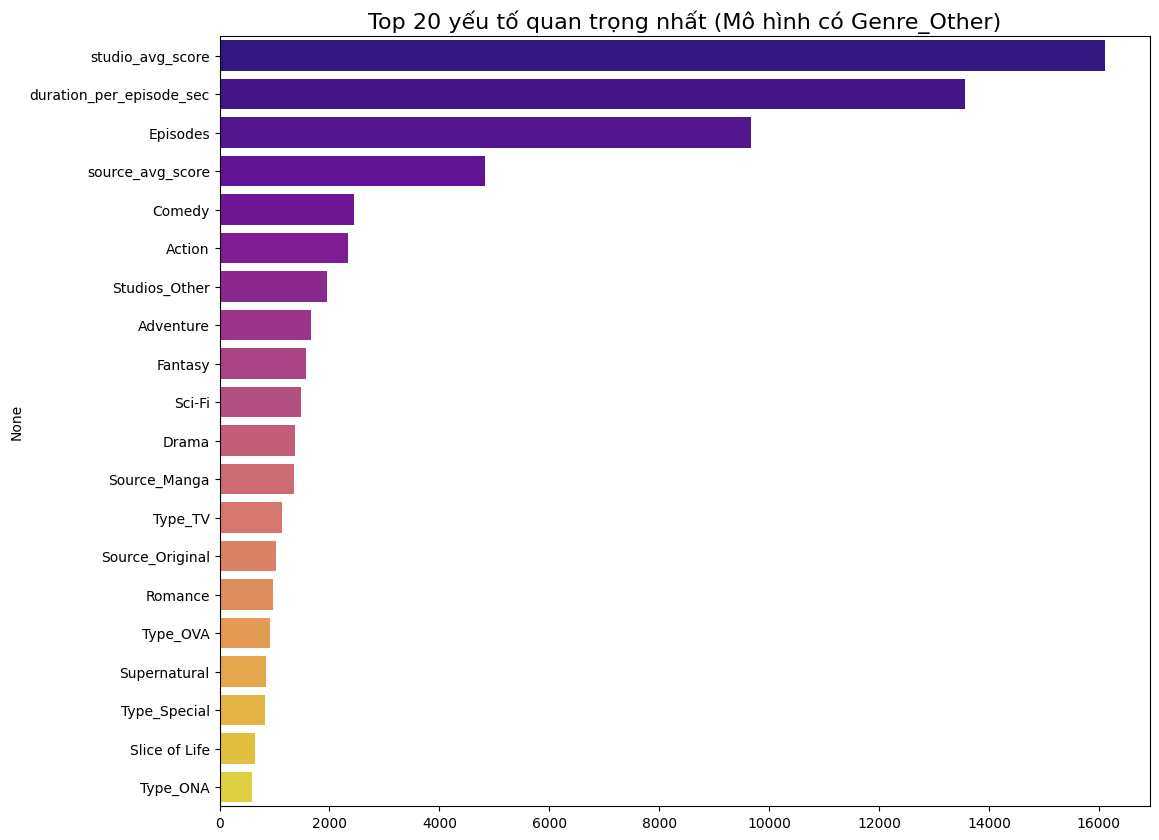


--- PHASE 4: TRIỂN KHAI MÔ HÌNH THÔNG MINH HƠN ---
Đã lưu thành công mô hình V5 và TẤT CẢ các bộ mã hóa/map cần thiết.

--- Ví dụ sử dụng hàm dự đoán V2 ---
LỖI: Không tìm thấy file model V2.


In [10]:
# ==============================================================================
# PHASE 3 (SIÊU NÂNG CẤP - V3): XÂY DỰNG MÔ HÌNH VỚI "GENRE_OTHER"
# ==============================================================================
print("\n--- PHASE 3 (V5 - FINAL UPGRADE): FEATURE ENGINEERING & OPTUNA OPTIMIZATION ---")

# --- 3.1 Nâng cấp Feature Engineering ---
print("\nNâng cấp Feature Engineering: Tạo ra các 'feature uy tín'...")

features = ['Type', 'Source', 'Studios', 'Genres', 'Episodes', 'duration_per_episode_sec']
target = 'Score'
df_model = anime_data_set[features + [target]].dropna().copy()

# 1. Tạo feature uy tín cho Studio
studio_mean_score = anime_data_set.groupby('Studios')['Score'].mean()
df_model['studio_avg_score'] = df_model['Studios'].map(studio_mean_score)
# SỬA LỖI: Gán lại kết quả thay vì dùng inplace=True
df_model['studio_avg_score'] = df_model['studio_avg_score'].fillna(anime_data_set['Score'].mean())

# 2. Tạo feature uy tín cho Source
source_mean_score = anime_data_set.groupby('Source')['Score'].mean()
df_model['source_avg_score'] = df_model['Source'].map(source_mean_score)
# SỬA LỖI: Gán lại kết quả thay vì dùng inplace=True
df_model['source_avg_score'] = df_model['source_avg_score'].fillna(anime_data_set['Score'].mean())

# (Logic xử lý Genre_Other giữ nguyên)
df_model['Genres_list'] = df_model['Genres'].str.split(', ')
all_genre_counts = df_model.explode('Genres_list')['Genres_list'].value_counts()
CORE_GENRES = set(all_genre_counts.head(15).index) 
def process_genres_with_other(genre_list, core_genres):
    input_genres_set = set(genre_list)
    processed_list = list(input_genres_set.intersection(core_genres))
    if not input_genres_set.issubset(core_genres):
        processed_list.append('Genre_Other')
    return processed_list
df_model['Genres_processed'] = df_model['Genres_list'].apply(lambda g_list: process_genres_with_other(g_list, CORE_GENRES))

# --- Mã hóa dữ liệu ---
mlb = MultiLabelBinarizer()
genres_encoded = pd.DataFrame(mlb.fit_transform(df_model['Genres_processed']), columns=mlb.classes_, index=df_model.index)

top_30_studios = df_model['Studios'].value_counts().nlargest(30).index
df_model['Studios'] = df_model['Studios'].where(df_model['Studios'].isin(top_30_studios), 'Other')
categorical_features = ['Type', 'Source', 'Studios']
categorical_encoded = pd.get_dummies(df_model[categorical_features], drop_first=True, dtype=int)

# Cập nhật để bao gồm các feature uy tín mới
numerical_features = df_model[['Episodes', 'duration_per_episode_sec', 'studio_avg_score', 'source_avg_score']]
X = pd.concat([numerical_features, categorical_encoded, genres_encoded], axis=1)
y = df_model[target]
print(f"Kích thước cuối cùng của bộ dữ liệu huấn luyện (X): {X.shape}") 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# --- 3.2 Sử dụng Optuna để tìm kiếm siêu tham số ---
print("\nSử dụng Optuna để tìm kiếm siêu tham số tốt nhất một cách thông minh...")

def objective(trial):
    param = {
        'objective': 'regression_l1', 'metric': 'rmse',
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'num_leaves': trial.suggest_int('num_leaves', 20, 150),
        'max_depth': trial.suggest_int('max_depth', 5, 15),
        'subsample': trial.suggest_float('subsample', 0.7, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.7, 1.0),
        'random_state': 42, 'n_jobs': -1
    }
    model = lgb.LGBMRegressor(**param)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    r2 = r2_score(y_test, preds)
    return r2

# Tạo study và bắt đầu tối ưu hóa
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100) # Giữ nguyên 100 lần thử để tìm kết quả tốt nhất

# --- 3.3 Đánh giá mô hình tốt nhất ---
print("\n--- Đánh giá mô hình tốt nhất đã được tìm thấy bởi Optuna ---")
print("Đã tìm thấy bộ tham số tốt nhất:", study.best_params)
print(f"Giá trị R-squared (R²) tốt nhất đạt được: {study.best_value:.4f}")

# Huấn luyện mô hình cuối cùng với bộ tham số tốt nhất
best_params = study.best_params
best_lgbm_model = lgb.LGBMRegressor(random_state=42, n_jobs=-1, **best_params)
best_lgbm_model.fit(X_train, y_train)

# --- 3.4 Trực quan hóa các yếu tố quan trọng ---
feature_importances = pd.Series(best_lgbm_model.feature_importances_, index=X.columns).sort_values(ascending=False).head(20)
plt.figure(figsize=(12, 10))
sns.barplot(x=feature_importances.values, y=feature_importances.index, hue=feature_importances.index, palette='plasma', legend=False)
plt.title('Top 20 yếu tố quan trọng nhất (Mô hình có Genre_Other)', fontsize=16)
plt.show()

# ==============================================================================
# PHASE 4: TRIỂN KHAI MÔ HÌNH THÔNG MINH HƠN
# ==============================================================================
print("\n--- PHASE 4: TRIỂN KHAI MÔ HÌNH THÔNG MINH HƠN ---")

# --- 4.1 Lưu lại các thành phần quan trọng (THÊM core_genres) ---
# Lưu lại các map điểm trung bình
studio_mean_score = anime_data_set.groupby('Studios')['Score'].mean()
source_mean_score = anime_data_set.groupby('Source')['Score'].mean()
joblib.dump(studio_mean_score, 'models/studio_mean_score_map.joblib')
joblib.dump(source_mean_score, 'models/source_mean_score_map.joblib')

# Đổi tên các file lưu để không bị nhầm lẫn
joblib.dump(best_lgbm_model, 'models/anime_score_predictor_v5.pkl')
joblib.dump(mlb, 'models/genres_encoder_v5.pkl')
joblib.dump(X.columns, 'models/model_features_v5.pkl')
joblib.dump(top_30_studios, 'models/top_30_studios_v5.pkl')
joblib.dump(CORE_GENRES, 'models/core_genres_v5.joblib')

print("Đã lưu thành công mô hình V5 và TẤT CẢ các bộ mã hóa/map cần thiết.")

# --- 4.2 Xây dựng hàm dự đoán V2 ---
def predict_anime_score_v2(type_str, source_str, studio_str, genres_list, episodes_int, duration_per_episode_sec_int):
    try:
        model = joblib.load('anime_score_predictor_v2.pkl')
        genres_encoder = joblib.load('genres_encoder_v2.pkl')
        model_columns = joblib.load('model_features_v2.pkl')
        saved_top_30_studios = joblib.load('top_30_studios_v2.pkl')
        saved_core_genres = joblib.load('core_genres_v2.joblib') # <-- TẢI ARTIFACT MỚI
    except FileNotFoundError:
        print("LỖI: Không tìm thấy file model V2.")
        return None

    # Áp dụng logic xử lý 'Genre_Other' cho input
    final_genres_for_model = process_genres_with_other(genres_list, saved_core_genres)

    data = {'Type': [type_str], 'Source': [source_str], 'Studios': [studio_str], 'Episodes': [episodes_int], 'duration_per_episode_sec': [duration_per_episode_sec_int]}
    input_df = pd.DataFrame(data)
    input_df['Studios'] = input_df['Studios'].where(input_df['Studios'].isin(saved_top_30_studios), 'Other')
    
    categorical_input = pd.get_dummies(input_df[['Type', 'Source', 'Studios']], drop_first=True, dtype=int)
    genres_input_encoded = pd.DataFrame(genres_encoder.transform([final_genres_for_model]), columns=genres_encoder.classes_)
    numerical_input = input_df[['Episodes', 'duration_per_episode_sec']]

    final_input_df = pd.concat([numerical_input, categorical_input, genres_input_encoded], axis=1)
    final_input_df = final_input_df.reindex(columns=model_columns, fill_value=0)

    predicted_score = model.predict(final_input_df)
    return predicted_score[0]

# --- 4.3 Ví dụ sử dụng ---
print("\n--- Ví dụ sử dụng hàm dự đoán V2 ---")

# Ví dụ 3 (MỚI): Một anime với thể loại "Cyberpunk" không có trong dữ liệu gốc
cyberpunk_anime_genres = ['Action', 'Sci-Fi', 'Cyberpunk'] # 'Cyberpunk' là thể loại mới
predicted_score_cyberpunk = predict_anime_score_v2(
    type_str='TV',
    source_str='Original',
    studio_str='Trigger', # Studio này không nằm trong top 30
    genres_list=cyberpunk_anime_genres,
    episodes_int=12,
    duration_per_episode_sec_int=1440
)

if predicted_score_cyberpunk is not None:
    print(f"\nThông tin anime mới (có thể loại lạ):")
    print(f"- Genres: {', '.join(cyberpunk_anime_genres)}")
    print(f"Mô hình sẽ xử lý các thể loại thành: {process_genres_with_other(cyberpunk_anime_genres, CORE_GENRES)}")
    print("---------------------------------------------")
    print(f"===> ĐIỂM SỐ DỰ ĐOÁN: {predicted_score_cyberpunk:.2f}/10")